In [ ]:
%%javascript
/** Below because this notebook is pretty large */
var rto = 500;
console.log('NB: Increase require timeout to ' + rto + ' seconds');
window.requirejs.config({waitSeconds: rto}); 

# Business Problem

<img src="images/FORSALEBANNER.jpg" width="400">

## The Zillow Failure

As reported on a November 9, 2021 episode of the Wall Street Journal, "The Journal" podcast, Zillow attempted to transform its business in 2018 by buying up thousands of homes all over the country. By utilizing it's massive amount of search data, Zillow hoped to leverage its advantage. According to the podcast,

> Ryan Knutson: So Zillow went huge and bought thousands of homes all over the country. The company would often do some light renovations and turn around and sell them quickly.

Unfortunately, for Zillow, their efforts ultimately failed (the pandemic did not help of course). Zillow has returned to its core efforts.

>Will Parker: So there's a debate right now about whether what happened at Zillow is a Zillow problem or an iBuyer problem. And I think what happens with its competitors, these other companies, is really going to tell us a lot about what the answer to that question really is. 

## Project Goals

The problem Zillow experienced offer an opportunity for competitors in the market. In this project I will use Linear Regression techniques identify key areas where a real estate competitor could make improvements to tranches of homes in an effort to reliably secure profit. I expect a variety of factors to play a role in the analysis. 

# Data Understanding

The give Dataset is for King County, Washington. According to Wikipedia:
>King County is located in the U.S. state of Washington. The population was 2,269,675 in the 2020 census, making it the most populous county in Washington, and the 12th-most populous in the United States. The county seat is Seattle, also the state's most populous city.

King County has a mixture of the urban Seattle areas and surrounding Suburbs. Given the size and population I anticipate it will serve as an excellent case study for further modeling projects.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
pd.reset_option('display.float_format')

In [425]:
#importing standard packages for intital data analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('data/kc_house_data.csv')

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Column Names

The column names are are included in a markdown file that I will make into a readable dataframe.

In [27]:
# f = open(, 'r')
# f.readlines()
with open("data/column_name.md") as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]
#creating a list of column names
col_list= []
#adding oher information into an appendix list
#only including the column names and description in list
for line in lines[1:]:
    if "-" in line:
        col_list.append(line.split("-"))
    else:
        col_list.append(line)

In [28]:
for idx, col in enumerate(col_list):
    if len(col)>2:
        col_list[idx-1].append(col)

In [29]:
for col in col_list:
    if len(col)>3:
        col_list.remove(col)

In [30]:
pd.set_option('max_colwidth', 200)
col_names = pd.DataFrame(col_list[1:],columns=['Name','Description','Notes'])

In [31]:
col_names

,Name,Description,Notes
0,* `date`,Date house was sold,None
1,* `price`,Sale price (prediction target),None
2,* `bedrooms`,Number of bedrooms,None
3,* `bathrooms`,Number of bathrooms,None
4,* `sqft_living`,Square footage of living space in the home,None
5,* `sqft_lot`,Square footage of the lot,None
6,* `floors`,Number of floors (levels) in house,None
7,* `waterfront`,Whether the house is on a waterfront,"* Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts"
8,* `view`,Quality of view from house,"* Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other"
9,* `condition`,How good the overall condition of the house is. Related to maintenance of house.,* See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code


This dataframe gives a clear explanation of each of the feautres that I will explore below individually.

# Data Exploration

## Price

In [32]:
data['price'].describe()

count     21597.00000
mean     540296.57351
std      367368.14010
min       78000.00000
25%      322000.00000
50%      450000.00000
75%      645000.00000
max     7700000.00000
Name: price, dtype: float64

In [33]:
average_price = data['price'].mean()
median_price = data['price'].median()

print(f'The average home price in the data set is {average_price}, the median price is {median_price}')

The average home price in the data set is 540296.5735055795, the median price is 450000.0


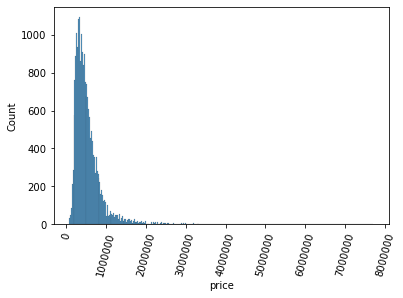

In [34]:
sns.histplot(data=data, x='price')
plt.ticklabel_format(style='plain')
plt.xticks(rotation=75);

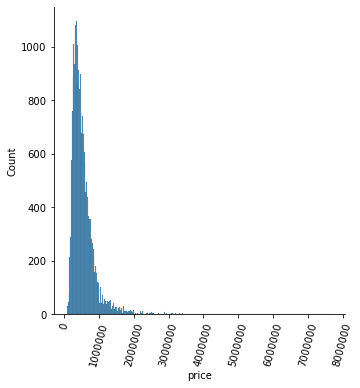

In [35]:
sns.displot(data=data, x='price')
plt.ticklabel_format(style='plain')
plt.xticks(rotation=75);

The price is the target variable for the Linear Regression Analysis. It is a highly right skewed dataset in this regard.

## Year Built Analysis

In [36]:
data['yr_built'].sort_values()

14069    1900
14783    1900
10973    1900
115      1900
4693     1900
         ... 
20235    2015
7519     2015
14911    2015
4150     2015
19789    2015
Name: yr_built, Length: 21597, dtype: int64

### Top Build Years

The data contains both a "date" column and "year" column. The data set starts in 1900 and extends to 2015. So we have a mixture of old homes and new homes. Let's try to get a better sense of what that split.

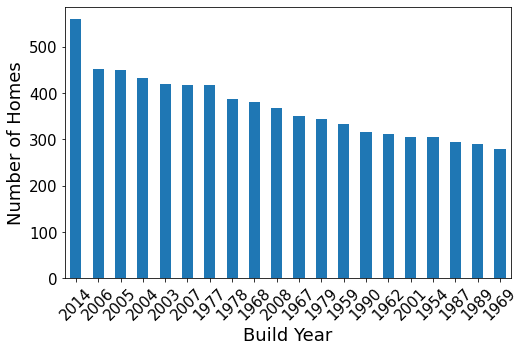

In [37]:
#Sorting the year built to show thge top years built with value counts.
top_home_built_yrs = data['yr_built'].value_counts(sort=True).head(20)

#displaying a bar chart of the years by number of homes built
top_build_yrs = top_home_built_yrs.plot(kind='bar', rot=45, figsize = (8,5),fontsize=15)
top_build_yrs.set_xlabel('Build Year', fontsize=18)
top_build_yrs.set_ylabel('Number of Homes', fontsize=18);

A quick bar chart reveals that the top five years of home building occurred recently (the past 20 years). This may or may not be relevent later, on. It's interesting, but let's also do a deeper dive to get some information on decade by decade home building maybe.

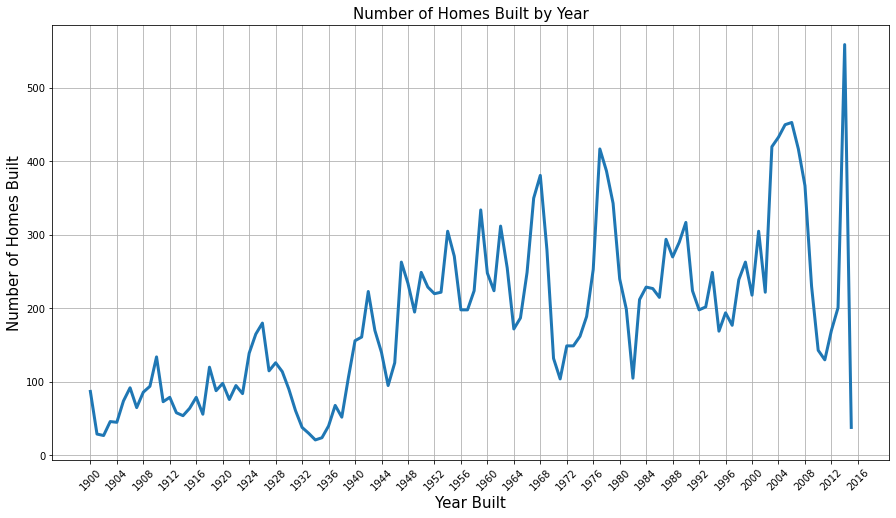

In [38]:
#setting a range for the xticks
xt = list(range(1900,2020,4))

#performing a count of the count of the home build year
years_built = data.yr_built.value_counts()
years_built = years_built.sort_index(ascending=True)

years_built_plot = years_built.plot(kind='line', figsize=(15,8),rot=45,grid=True, linewidth=3)
years_built_plot.set_xticks(xt)
years_built_plot.set_xlabel('Year Built',fontsize=15)
years_built_plot.set_ylabel('Number of Homes Built',fontsize=15)
years_built_plot.set_title('Number of Homes Built by Year', fontsize=15);

### Builds by Decade

Text(0, 0.5, 'Homes Built')

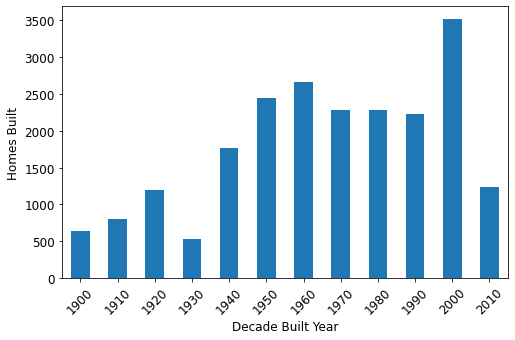

In [39]:
#Eliminating the last digit on the year built and multiplying by ten
decades = data.yr_built//10*10
decades = decades.value_counts().sort_index(ascending=True)

decade_plot = decades.plot(kind='bar',figsize=(8,5), rot=45, fontsize=12)
decade_plot.set_xlabel('Decade Built Year', fontsize=12)
decade_plot.set_ylabel('Homes Built', fontsize=12)



Unsurprsingly home builds have been on the increase with blips of slowdowns - less homes were built during the Great Depression, and after the 2008 financial crisis. The 2010s are incomplete as a dataset goes, so look to be a declning decade on the charts, but 2014 showed to be the highest year of home builds.   

This isn't just a sign of when homes were built, this is a data set of the build date of homes that were sold. So Initially there is a sense that more recent homes are perhaps more deseriable. 

In [40]:
data.yr_built.value_counts()[2015]

38

The home built year of 38 in 2015 suggests I may consider throwing out the 2015 data, or at least accounting for the year built as incomplete in some way from the end of the data set, I may think of treating 'year built' as categorical. Considering the target of SalePrice, potentially year built will be an important coefficient in this determination.

## Date Sold Information

According to the outside chart breakdown, the 'date' column indicates, the year sold information is in the 'date' column.

In [318]:
from datetime import datetime

In [506]:
#Converting date column to datetime column
data['date'] = pd.to_datetime(data['date'])

In [43]:
earliest_date = datetime.strftime(data['date'].min(), '%B %d%, %Y')
latest_date = datetime.strftime(data['date'].max(), '%B %d%, %Y')

print(f'The earliest sale by date is {earliest_date}, the most recent sale date is {latest_date}.')



The earliest sale by date is May 02, 2014, the most recent sale date is May 27, 2015.


In [44]:
#Top 10 correlations 
corrs = data.corr()['price'].sort_values(ascending=False)[1:-11]
corrs

sqft_living     0.70192
grade           0.66795
sqft_above      0.60537
sqft_living15   0.58524
bathrooms       0.52591
view            0.39573
bedrooms        0.30879
Name: price, dtype: float64

This is a very cursory look at the correlations in the dataset. I will further look at multicollinearties later in the noteboo. But at first glance the best indicators look to be sqft, "grade," and number of bathrooms. Of course, this is uncleansed data, that hasn't been normalized, or invesitaged. I will want to seperate categoricals and continuous, remove multicorrelations.

<AxesSubplot:>

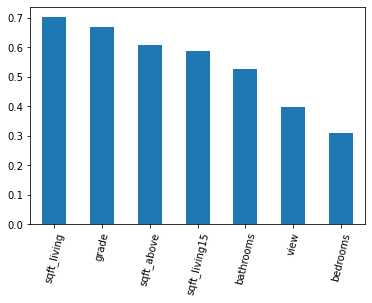

In [45]:
corrs.plot(kind='bar', rot=76)

In [46]:
month_sales = data.date.dt.month.value_counts().sort_index(ascending=True)

In [47]:
month_sale_date = data.date.dt.month.value_counts().sort_index()
month_sale_date

1      978
2     1247
3     1875
4     2229
5     2414
6     2178
7     2211
8     1939
9     1771
10    1876
11    1409
12    1470
Name: date, dtype: int64

In [48]:
import calendar
months = []

for x in range(1,13):
    months.append(calendar.month_name[x])

In [49]:
import numpy as np
np.array(month_sale_date)
monthly_sales = list(zip(months,month_sale_date))

### Sales on Monthly Basis

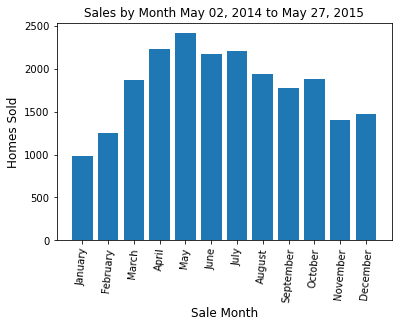

In [50]:
monthly_sales =pd.DataFrame(monthly_sales, columns=['Month', 'Sales'])
monthly_sales
plt.bar(x=monthly_sales['Month'],height=monthly_sales['Sales'])
plt.xticks(rotation=85)
plt.xlabel('Sale Month', fontsize=12)
plt.ylabel('Homes Sold', fontsize=12)
plt.title(f'Sales by Month {earliest_date} to {latest_date}');

Homes sales in this area follow a predictable monthly pattern, the sales transactions were lowest in the January February, tick up in May and taper off in the Fall months. This may factor into the model, but so far this is the merely looking at when the homes are sold with factoring into price. Let's see if we can do a simple look at sale price vs month.

In [51]:
import numpy as np
data["month"] = data['date'].map(lambda x: x.month)
aggs = data.groupby(data.month)['price'].agg([np.mean,np.median])

In [52]:
aggs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean    12 non-null     float64
 1   median  12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


### Aggregate Monthly Data

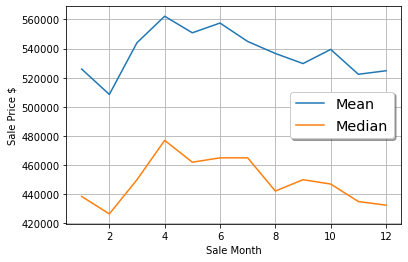

In [53]:
agg_chart = aggs.plot(kind='line',grid=True)
agg_chart.set_ylabel('Sale Price $')
agg_chart.set_xlabel('Sale Month')
agg_chart.legend(('Mean', 'Median'),loc='center right', shadow=True, fontsize='x-large',fancybox=True)

Mean and Median sale price follow a similar but not exact pattern as well. Sale Price does seem to peak in April, and gradually lowers until December. Not only are fewer homes sold in the colder months, but the average price and the median price declines as well. Perhaps sellers lower the price as the year goes on, or the pricier homes are removed bought up?

In [54]:
monthly_sales

,Month,Sales
0,January,978
1,February,1247
2,March,1875
3,April,2229
4,May,2414
5,June,2178
6,July,2211
7,August,1939
8,September,1771
9,October,1876


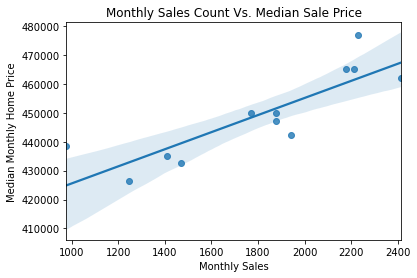

In [55]:
sns.regplot(x=monthly_sales.Sales,y=aggs['median'])
plt.xlabel('Monthly Sales')
plt.ylabel('Median Monthly Home Price')
plt.title('Monthly Sales Count Vs. Median Sale Price');

The above chart indicates a some linear relationship between Monthly Sales and the Median Sale Price, Perhaps this will be helpful later on for the regression, but, as sales volume is higher, sale price indeed seems to be higher. Let's see if we can look at this on not just a monthly basis.

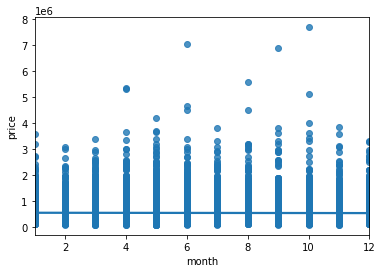

In [56]:
sns.regplot(data=data,x='month',y='price');

This scatterplot displays some relationship of month to sale price. The same sort of relationship with some outliers is show. This will be further explored later in the notebook - the potential relationship between various features in the dataset and the sale price on a monthly price.

### Renovation Year

In [57]:
data['yr_renovated'].describe()

count   17755.00000
mean       83.63678
std       399.94641
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max      2015.00000
Name: yr_renovated, dtype: float64

In [58]:
data['yr_renovated'].value_counts()

0.00000       17011
2014.00000       73
2003.00000       31
2013.00000       31
2007.00000       30
              ...  
1946.00000        1
1959.00000        1
1971.00000        1
1951.00000        1
1954.00000        1
Name: yr_renovated, Length: 70, dtype: int64

In [59]:
data['yr_renovated'].value_counts().head(20)

0.00000       17011
2014.00000       73
2003.00000       31
2013.00000       31
2007.00000       30
2000.00000       29
2005.00000       29
1990.00000       22
2004.00000       22
2009.00000       21
1989.00000       20
2006.00000       20
2002.00000       17
1991.00000       16
1998.00000       16
1984.00000       16
1999.00000       15
2008.00000       15
2010.00000       15
2001.00000       15
Name: yr_renovated, dtype: int64

Year renovation data reveals that most homes in the dataset haven't been renovated, for this intitial dive, let's remove them from the series to have a better sense of renovation information.

In [60]:
#Removing where the "year renovated" is 0
renovation_filtered = data.yr_renovated[data['yr_renovated']!=0].copy()

In [61]:
renovation_filtered = pd.to_datetime(renovation_filtered, format='%Y').dt.year

In [62]:
top_20_renos = renovation_filtered.value_counts().head(20)

Text(0.5, 1.0, 'Top 20 Renovations Per Year')

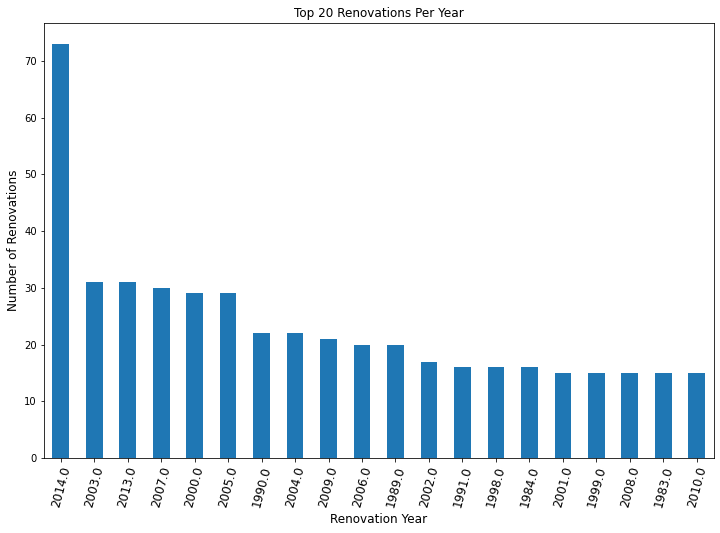

In [63]:
top_20_renos.plot(kind='bar',rot=75, figsize=(12,8))
plt.xticks(fontsize=12);
plt.xlabel('Renovation Year',fontsize=12)
plt.ylabel('Number of Renovations', fontsize=12)
plt.title('Top 20 Renovations Per Year', fontsize=12)

Of the homes sold in this dataset, 2014 was huge for renovations. This may not be surprising, what might be interesting to look at is what year those homes were constructed.

### Renovation Year Vs. Year Built

In [64]:
#Working with a dataframe that only has renovated homes
reno_filtered = data[data['yr_renovated']!=0].copy()

In [65]:
#Top Years Build Years for Renovated Homes
reno_filtered['yr_built'].value_counts().head(20)

2014    102
1968     85
1977     84
2003     78
2008     75
1967     74
2006     73
2005     72
1979     71
1947     70
1962     70
2007     70
2004     69
1955     68
1950     67
1942     66
1978     65
1959     65
1954     65
1969     61
Name: yr_built, dtype: int64

In [66]:
#Average year for renovated home
average_year = str(reno_filtered['yr_built'].mean())[0:4]

#Median year for renovated home
median_year = str(reno_filtered['yr_built'].median())[0:4]

print(f'The average built year for renovated homes is {average_year}, the median year is {median_year}')

The average built year for renovated homes is 1965, the median year is 1967


Perhaps unsurprisingly renovated homes date back to around World War II. Let's look at the average time between build and renovation.

In [67]:
int(reno_filtered['yr_renovated'].mean()-reno_filtered['yr_built'].mean())

30

On average it was 56 years between construction and renovation for the renovated properties. 

The following chart shows us the top build years of the renovated homes that were sold. No real trends seem to be gleaned here, 1950 tops the chart, but then homes built in 1924 are third on the list.

<AxesSubplot:>

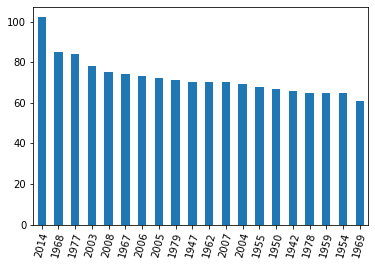

In [68]:
reno_filtered['yr_built'].value_counts().head(20).plot(kind='bar', rot=75)

In contrast once again most of the sold homes in the data set are from 2014, so recent homes seem to be the top homes on the list. Unrenovated homes make up most of the dataset.

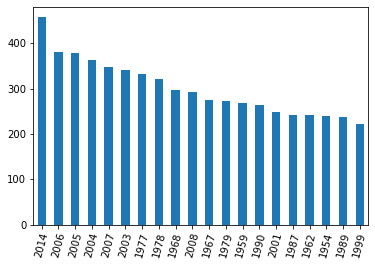

In [69]:
data[data['yr_renovated']==0]['yr_built'].value_counts().head(20).plot(kind='bar',rot=75);

In [70]:
reno_filtered['price'].mean()

575976.7860880942

In [71]:
#Number of renovated properties
reno_filtered['price'].count()

4586

The average price for renovated home was 768,901. I think I need to be careful reading into this number, because there is a question of why these homes have been selected for renovation. 

In [72]:
#Number of unrenovated properties
data[data['yr_renovated']==0]['price'].count()

17011

The renovated vs. unrenovated properties contrast sharply. Renovated properties are much older, constructed around World War Two. The top properties unrenovated are recent builds - maybe part of large developments, or perhaps new homes are that much more deseriable. 

In [73]:
reno_filtered[reno_filtered['yr_built']<=1980]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,...,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639,12
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,...,770,0.0,1933,nan,98028,47.73790,-122.23300,2720,8062,2
12,114101516,2014-05-28,310000.00000,3,1.00000,1430,19901,1.50000,0.00000,0.00000,...,1430,0.0,1927,nan,98028,47.75580,-122.22900,1780,12697,5
26,1794500383,2014-06-26,937000.00000,3,1.75000,2450,2691,2.00000,0.00000,0.00000,...,1750,700.0,1915,nan,98119,47.63860,-122.36000,1760,3573,6
28,5101402488,2014-06-24,438000.00000,3,1.75000,1520,6380,1.00000,0.00000,0.00000,...,790,730.0,1948,nan,98115,47.69500,-122.30400,1520,6235,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,4305600360,2015-02-25,500012.00000,4,2.50000,2400,9612,1.00000,0.00000,0.00000,...,1230,1170.0,1962,2009.00000,98059,47.47990,-122.12700,2430,5539,2
20431,3319500628,2015-02-12,356999.00000,3,1.50000,1010,1546,2.00000,nan,0.00000,...,1010,0.0,1971,2014.00000,98144,47.59980,-122.31100,1010,1517,2
20946,1278000210,2015-03-11,110000.00000,2,1.00000,828,4524,1.00000,0.00000,0.00000,...,828,0.0,1968,2007.00000,98001,47.26550,-122.24400,828,5402,3
21027,9276200220,2014-07-17,375000.00000,1,1.00000,720,3166,1.00000,0.00000,0.00000,...,720,0.0,1920,nan,98116,47.58110,-122.38900,1140,6250,7


The vast majority of renovated homes were built before 1980. Just for fun right now let's take a look at homes built before 1980 renovated vs. unrenovated.

In [74]:
reno_filtered[reno_filtered['yr_built']<1980]['price'].mean()

563035.372242959

In [75]:
#creating a dataframe of unrenovated properties
unrenovated_filtered = data[data['yr_renovated']==0].copy()

In [76]:
#filtering unrenovated properties to find the average price before 1980
unrenovated_filtered[unrenovated_filtered['yr_built']<1980]['price'].mean()

486308.97303059377

The plot below shows build year alone doesn't have a strong correlation to an increase in price.

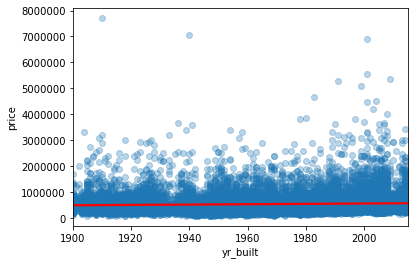

In [77]:
sns.regplot(data=data, x='yr_built',y='price',line_kws={"color": "red"},scatter_kws={'alpha':0.3})
plt.ticklabel_format(style='plain') 

## Bedrooms

In [78]:
#Number of bedrooms per apartment sold
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

<AxesSubplot:>

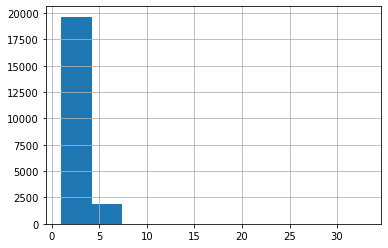

In [79]:
data['bedrooms'].hist()

The data is definetely skewed to the left, with outliers affecting the histogram. Let's drop the outliers, to have a better picture.

<AxesSubplot:>

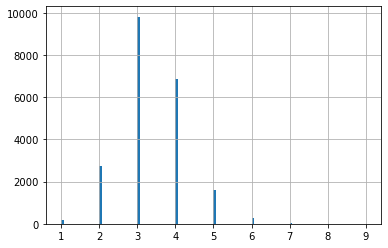

In [80]:
data[data['bedrooms']<10]['bedrooms'].hist(bins='auto')

The number of rooms actually has a somewhat normal distribution in this histogram, I believe we are dealing with a fairly normally distrubted set of bedrooms in each home.

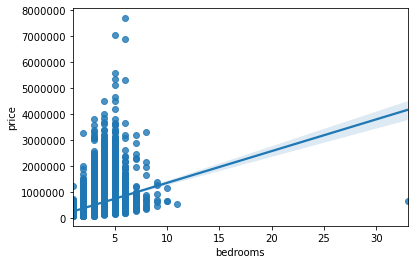

In [81]:
sns.regplot(data=data, x='bedrooms',y='price')
plt.ticklabel_format(style='plain') 

This does seem to show somewhat of linear relationship, as bedrooms go up, price does look to go up a little bit. 

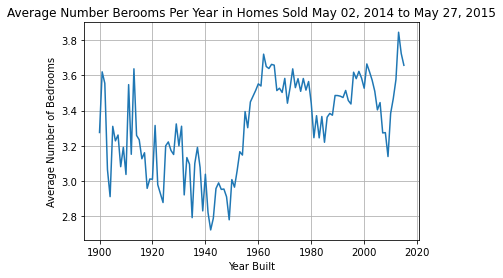

In [82]:
num_brooms_per_year = data.groupby('yr_built')['bedrooms'].mean().plot(kind='line', grid=True)
num_brooms_per_year
plt.xlabel('Year Built')
plt.ylabel('Average Number of Bedrooms')
plt.title(f'Average Number Berooms Per Year in Homes Sold {earliest_date} to {latest_date}');

It might not be particularly revealing, but it is interesting to see the rise and fall of number of bedrooms per househould in the data set. It indeed appears that homes had more bedrooms, it sank, and rose up in the 60s and 70s. Like many trends it fell around 2008 and went back up.

In [83]:
data.groupby('yr_built')['bedrooms'].mean().sort_values(ascending=False).head(10)

yr_built
2013   3.84577
2014   3.72451
1962   3.72115
2001   3.66557
1965   3.66310
1966   3.65863
2015   3.65789
1963   3.65098
1964   3.63953
1913   3.63793
Name: bedrooms, dtype: float64

In [84]:
data.groupby('yr_built')['bedrooms'].mean()[2009]

3.139130434782609

## Bathrooms

In [85]:
data['bathrooms']

0       1.00000
1       2.25000
2       1.00000
3       3.00000
4       2.00000
          ...  
21592   2.50000
21593   2.50000
21594   0.75000
21595   2.50000
21596   0.75000
Name: bathrooms, Length: 21597, dtype: float64

In [86]:
data['bathrooms'].value_counts()

2.50000    5377
1.00000    3851
1.75000    3048
2.25000    2047
2.00000    1930
1.50000    1445
2.75000    1185
3.00000     753
3.50000     731
3.25000     589
3.75000     155
4.00000     136
4.50000     100
4.25000      79
0.75000      71
4.75000      23
5.00000      21
5.25000      13
5.50000      10
1.25000       9
6.00000       6
5.75000       4
0.50000       4
8.00000       2
6.25000       2
6.75000       2
6.50000       2
7.50000       1
7.75000       1
Name: bathrooms, dtype: int64

Value counts on the bahhrooms reveals that the top bathroom amount is 2.5 bathrooms. Half and quarter bathrooms are a feeature in some living situations, so this does seem to be an accurate dataset of some kind. Let's look at a histogram.

<AxesSubplot:>

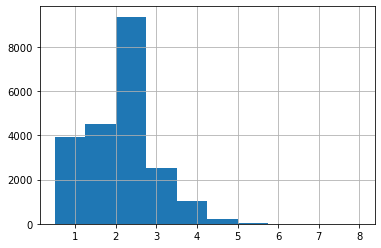

In [87]:
data.bathrooms.hist()

Once again this isn't perfectly normal, but let's also throw out some of the outliers for now.

<AxesSubplot:>

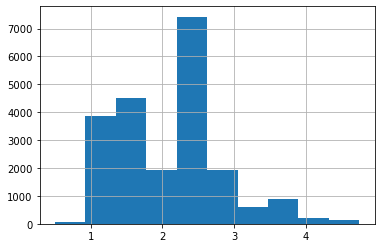

In [88]:
data[data.bathrooms<5].bathrooms.hist()

This isn't a normal distrubiton, maybe more of a binomial distribution? I will have to look more into this, but its tricky since this isn't quiete a categorical or a conitinuous.

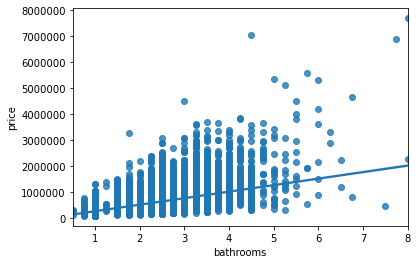

In [89]:
sns.regplot(data=data, x='bathrooms',y='price')
plt.ticklabel_format(style='plain') 

This is consistent with the initial correlations we saw previously, there is some linearity in regards to number of bathrooms and the price of a home, This will be a feature to keep in mind, interestly it has a higher initial correlation than the number of bedrooms. Bathrooms are certainly a neccesisty, but also an ammenitiy. Maybe we can look at home number of home affects homes with similar number of bedrooms? Is that an interaction?

I'm not really sure what to do right now, but for now I am going to look at how bathrooms affect homes of a set number of bedrooms.

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

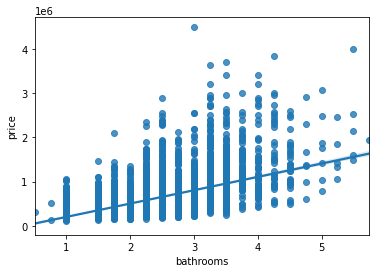

In [90]:
sns.regplot(data=data[data['bedrooms']==4], x='bathrooms',y='price')

In [91]:
bedroom_range = sorted(data['bedrooms'].value_counts().index)
correlation_per_bdroom = []
for x in bedroom_range:
    correlation_per_bdroom.append(data[data['bedrooms']==x].corr()['price']['bathrooms'])
correlation_per_bdroom = correlation_per_bdroom[0:10]
bednbath_array = list(zip(bedroom_range[0:10],correlation_per_bdroom))

Text(0.5, 1.0, 'Correlation of Bathrooms to Sale Price as Bedrooms Increase')

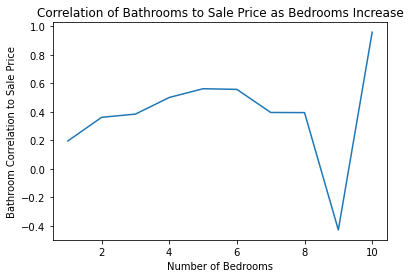

In [92]:
plt.plot(bedroom_range[0:10],correlation_per_bdroom)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Bathroom Correlation to Sale Price')
plt.title('Correlation of Bathrooms to Sale Price as Bedrooms Increase')

This is some window into how bathrooms correlation changes as the number of bedrooms change. What I am looking for is to see if the value add of bathroom changes as each bedroom number increases. What I do see is it is a better correlation until about 6 bedrooms, but of course we do not have many homes on those higher end in the data set.

I think there is more epxloring to be done in the bathroom area and will return to it later.

## sqft_living 

The Square Foot Living represents a major feature as it is the actual living space of the homes that were sold. It also has the highest correlation on our simple correlation list.

In [93]:
data.corr()['price']['sqft_living']

0.7019173021377597

In [94]:
data['sqft_living'].describe()

count   21597.00000
mean     2080.32185
std       918.10613
min       370.00000
25%      1430.00000
50%      1910.00000
75%      2550.00000
max     13540.00000
Name: sqft_living, dtype: float64

In [95]:
data['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

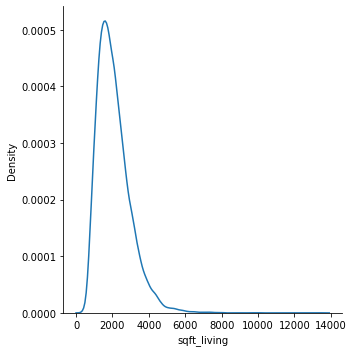

In [96]:
sqft_plot = sns.displot(data=data,x='sqft_living', kind='kde')

We have a somewhat normal distribution of homes, with outliers affecting the information.

<AxesSubplot:>

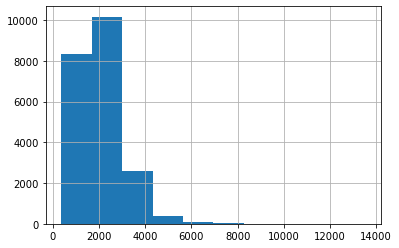

In [97]:
data['sqft_living'].hist()

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

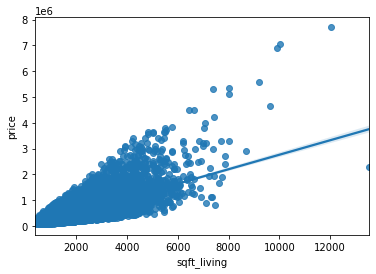

In [98]:
sns.regplot(data=data, x='sqft_living',y='price')

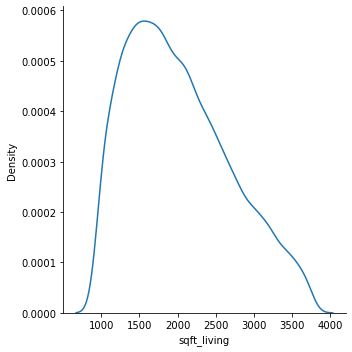

In [99]:
lower = data.sqft_living.quantile(.05)
upper = data.sqft_living.quantile(.95)

sqft_filtered = data[(data['sqft_living']>lower) & (data['sqft_living']<upper)]

sns.displot(data=sqft_filtered, x='sqft_living', kind='kde')

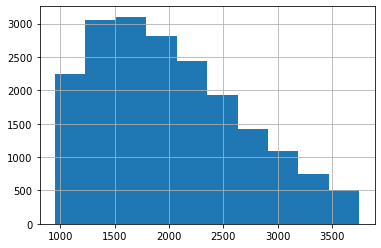

In [100]:
sqft_filtered['sqft_living'].hist();

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

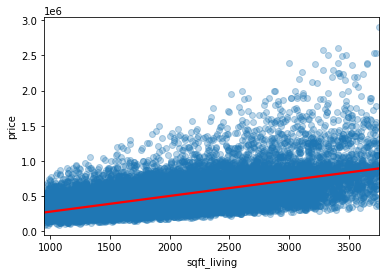

In [101]:
sns.regplot(data=sqft_filtered, x='sqft_living',y='price', line_kws={"color": "red"},scatter_kws={'alpha':0.3})

In [102]:
sqft_filtered.corr()['price']['sqft_living']

0.5785532312360123

Dropping the outliers of the dataset showed less of correlation with price. Perhaps square footage is a bigger drive of price at the tail of the dataset. 

## Square Foot Lot

In [103]:
data['sqft_lot']

0         5650
1         7242
2        10000
3         5000
4         8080
         ...  
21592     1131
21593     5813
21594     1350
21595     2388
21596     1076
Name: sqft_lot, Length: 21597, dtype: int64

In [104]:
data['sqft_lot'].describe()

count     21597.00000
mean      15099.40876
std       41412.63688
min         520.00000
25%        5040.00000
50%        7618.00000
75%       10685.00000
max     1651359.00000
Name: sqft_lot, dtype: float64

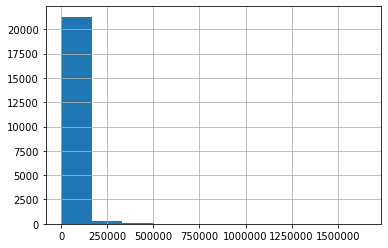

In [105]:
data['sqft_lot'].hist()
plt.ticklabel_format(style='plain', axis='x')

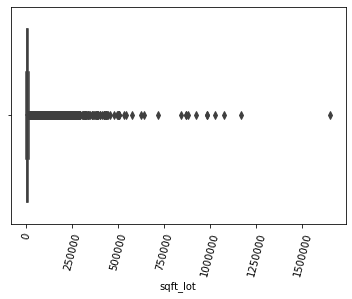

In [106]:
sns.boxplot(data=data, x='sqft_lot')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=75);

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


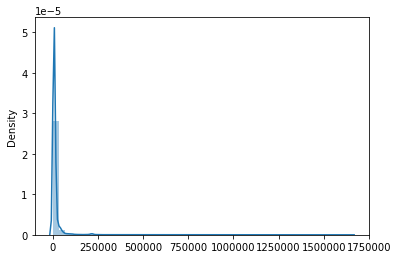

In [107]:
sns.distplot(x=data['sqft_lot'])
plt.ticklabel_format(style='plain', axis='x')

This data set has an extremely long tail and a high peak, most of the values are still skewed to the lower end of the data set. This means most homes are on smaller lots, but we have a long trail off of larger and larger homes. 

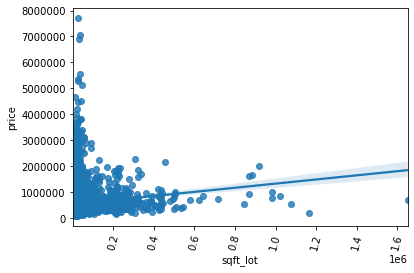

In [108]:
sns.regplot(data=data, x='sqft_lot',y='price')

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=75);

I think this scatterplot is interesting, because we have such variability in the low end of lot square footage. Some other factor is affecting the price in those instances, controlling for square footage, location, bathrooms, bedrooms, there is another factor at play.

## Floors

In [109]:
data['floors']

0       1.00000
1       2.00000
2       1.00000
3       1.00000
4       1.00000
          ...  
21592   3.00000
21593   2.00000
21594   2.00000
21595   2.00000
21596   2.00000
Name: floors, Length: 21597, dtype: float64

In [110]:
data['floors'].describe()

count   21597.00000
mean        1.49410
std         0.53968
min         1.00000
25%         1.00000
50%         1.50000
75%         2.00000
max         3.50000
Name: floors, dtype: float64

<AxesSubplot:>

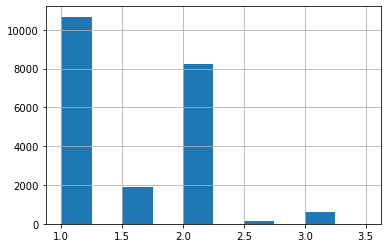

In [111]:
data['floors'].hist()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

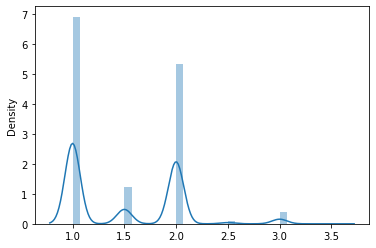

In [112]:
sns.distplot(x=data['floors'])

<AxesSubplot:xlabel='floors', ylabel='price'>

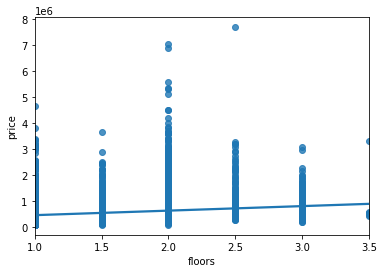

In [113]:
sns.regplot(data=data, x='floors', y='price')

There is a slight increase in price as floors go up.

## Waterfront

In [114]:
data['waterfront']

0           nan
1       0.00000
2       0.00000
3       0.00000
4       0.00000
          ...  
21592   0.00000
21593   0.00000
21594   0.00000
21595       nan
21596   0.00000
Name: waterfront, Length: 21597, dtype: float64

<AxesSubplot:>

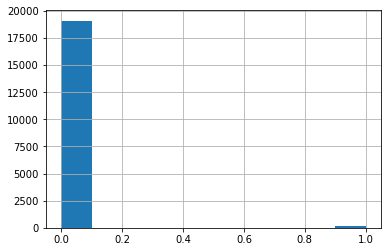

In [115]:
data['waterfront'].hist()

This column being categorical, a property either is or isn't on the waterfront, it doesn't offer as much chance for exploration and this will be thought of as an add on value when modeling later on I believe.

## View

In [116]:
data['view'].value_counts()

0.00000    19422
2.00000      957
3.00000      508
1.00000      330
4.00000      317
Name: view, dtype: int64

According to the value counts most homes are not thought of as having a nice view, and this might not be something that could be adjusted in home construction.

<AxesSubplot:>

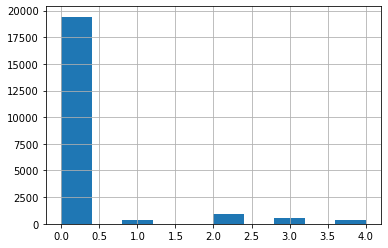

In [117]:
data['view'].hist()

According to the histogram most places are not thought of as really having a "view." I think this will later on be encoded as a categorical column when thinking about price.

<AxesSubplot:xlabel='view', ylabel='price'>

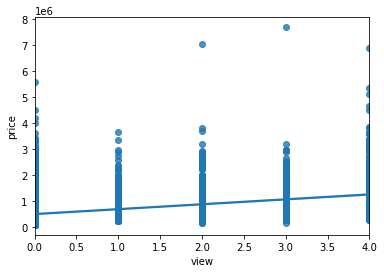

In [118]:
sns.regplot(data=data, x='view', y='price')

## Condition

In [119]:
data['condition']

0        3
1        3
2        3
3        5
4        3
        ..
21592    3
21593    3
21594    3
21595    3
21596    3
Name: condition, Length: 21597, dtype: int64

In [120]:
data['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

<AxesSubplot:>

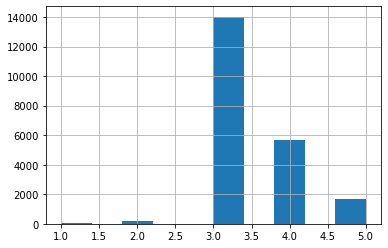

In [121]:
data['condition'].hist()

<AxesSubplot:xlabel='condition', ylabel='price'>

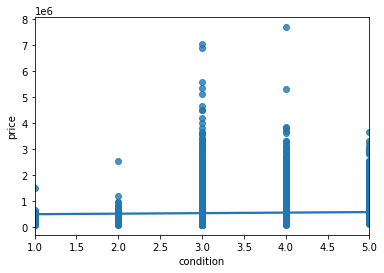

In [122]:
sns.regplot(data=data, x='condition',y='price')


It looks like condition doesn't have a strong correlation with price, as 3.0 homes show the highest condition. 

## Grade

In [123]:
data['grade']

0        7
1        7
2        6
3        7
4        8
        ..
21592    8
21593    8
21594    7
21595    8
21596    7
Name: grade, Length: 21597, dtype: int64

In [124]:
data['grade'].value_counts().sort_index(ascending=True)

3        1
4       27
5      242
6     2038
7     8974
8     6065
9     2615
10    1134
11     399
12      89
13      13
Name: grade, dtype: int64

<AxesSubplot:>

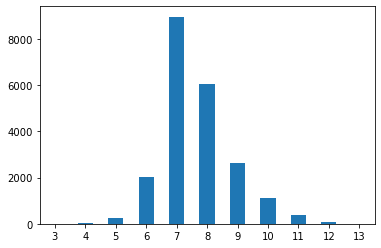

In [125]:
data['grade'].value_counts().sort_index(ascending=True).plot(kind='bar',rot=360)

There is an interesting distribution of values in this feature as well, but there is a central grouping.

<AxesSubplot:xlabel='grade', ylabel='price'>

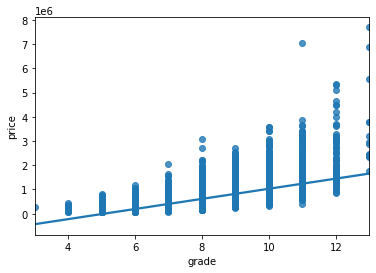

In [126]:
sns.regplot(data=data, x='grade',y='price')

In [127]:
data.corr()['price']['grade']

0.6679507713877846

In [128]:
data['combined_score'] = data['grade']+data['condition']
data.corr()['price']['combined_score']

0.6430319774785247

In [129]:
data.corr()['price']['condition']

0.03605637548609834

## Square Feet Above  and Square Feet Basement

In [130]:
data['sqft_above']

0        1180
1        2170
2         770
3        1050
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_above, Length: 21597, dtype: int64

<AxesSubplot:>

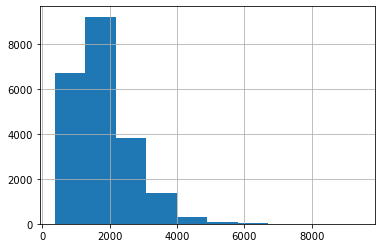

In [131]:
data['sqft_above'].hist()

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

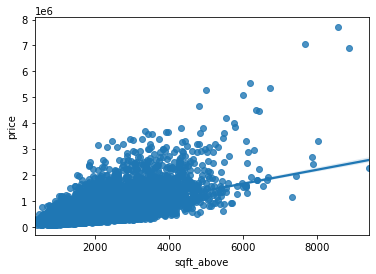

In [132]:
sns.regplot(data=data, x='sqft_above', y='price')

In [133]:
data.corr()['sqft_above']['price']

0.6053679437051825

In [134]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
4820.0        1
1525.0        1
1275.0        1
1281.0        1
1008.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [135]:
data[data['sqft_basement']=='?']=0.0

In [136]:
data[data['sqft_basement']==0]=0.0

In [137]:
data['sqft_basement'].value_counts()

0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
4820.0        1
1525.0        1
1275.0        1
1281.0        1
1008.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [138]:
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [139]:
data['sqft_basement'].value_counts()

0.00000       13280
600.00000       217
500.00000       209
700.00000       208
800.00000       201
              ...  
915.00000         1
295.00000         1
1281.00000        1
2130.00000        1
906.00000         1
Name: sqft_basement, Length: 303, dtype: int64

In [140]:
data.corr()['sqft_basement']['price']

0.3362627873444643

I changed the "?" values in the dataset to "0.0," does that alter the dataset too much? I could look at what the 0.0 columns look like and see if I can figure out what they are like in comparison to the '?' mark columns. This is an area to work on before making the baseline model. This is apart of the preprocessing part of this task.

## Zipcode

In [141]:
data['zipcode'].value_counts()

98103    588
98038    574
98115    568
98052    562
98042    542
        ... 
98102    100
98010     98
98024     79
98148     55
98039     49
Name: zipcode, Length: 71, dtype: int64

It will be interesting as to how to deal with the zip code column as the zip code is not a continium in the sense that it can be averaged and have the same sort of centrla tendencies. It is going to be like our other location information and be thought of as a sort of categorical data in and of itself maybe?

In [142]:
data.corr()['zipcode']['price']

0.20805130503859007

I am not surprised that the correlation between zipcode and price is not very high.

In [144]:
top_10_zips = data.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(20)

<AxesSubplot:>

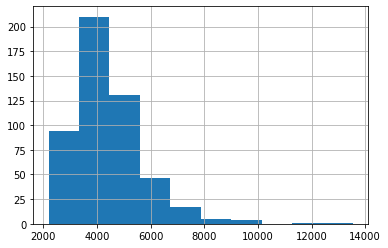

In [145]:
data[data['price']>1500000]['sqft_living'].hist()

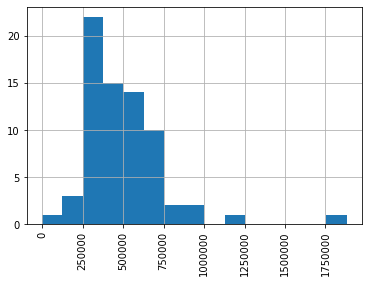

In [146]:
data.groupby('zipcode')['price'].median().hist(bins='auto')
plt.ticklabel_format(style='plain')
plt.xticks(rotation=90);

In [147]:
data['sqft_living'].mean()

2037.1767838125666

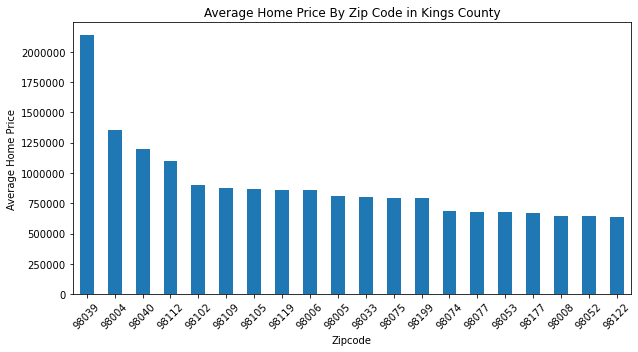

In [148]:

plt.rc('axes.formatter', useoffset=False);


fig, ax = plt.subplots()

ax.ticklabel_format(useOffset=False, style='plain')

top_10_zips.plot(kind='bar',rot=45,figsize=(10,5),ax=ax)
plt.title('Average Home Price By Zip Code in Kings County')
plt.ylabel('Average Home Price')
plt.xlabel('Zipcode')

plt.show() 

Above is the top zip codes per average price for the dataframe. Maybe this can be useful because trends might apply differently to different areas in the dataset as opposed to other less pricey zip code, or there might be some dividing by zip code at some point.

What can be assessed regarding the zip code information. How likely is it that location in one of these zip codes leads to meaningful rise in price? Is it easy to say that location is the determiner in the dataset, but am I going to treat this like a categorical value?

## Latitude and Longtitude

In [149]:
data['long'].value_counts()

0.00000       454
-122.29000    113
-122.30000    109
-122.36200    104
-122.29100     98
             ... 
-121.76000      1
-122.45900      1
-122.49600      1
-121.32500      1
-121.78500      1
Name: long, Length: 751, dtype: int64

In [150]:
data['lat'].value_counts()

0.00000     454
47.66240     17
47.53220     17
47.54910     17
47.69550     16
           ... 
47.44260      1
47.62570      1
47.38920      1
47.38610      1
47.27150      1
Name: lat, Length: 5019, dtype: int64

There are 454 locations without longtitude, and latitudal information.  Should thse be combined into one column and used to asses the location in any way? Then it can be plotted or something like that? 

In [151]:
data.groupby('long')['price'].mean()

long
-122.51900   575000.00000
-122.51500   565000.00000
-122.51400   999000.00000
-122.51200   290000.00000
-122.51100   370000.00000
                 ...     
-121.32100   375000.00000
-121.31900   241000.00000
-121.31600   155000.00000
-121.31500   158500.00000
0.00000           0.00000
Name: price, Length: 751, dtype: float64

In [152]:
data['long_lat'] = list(zip(data['long'],data['lat']))
data['long_lat'].value_counts().head(20)

(0.0, 0.0)                        454
(-122.28399999999999, 47.6647)      4
(-122.01700000000001, 47.5446)      4
(-122.34700000000001, 47.5171)      4
(-122.146, 47.6599)                 4
(-122.338, 47.6652)                 4
(-122.354, 47.6536)                 4
(-122.363, 47.6689)                 3
(-122.346, 47.6533)                 3
(-122.387, 47.5402)                 3
(-122.324, 47.6966)                 3
(-122.02600000000001, 47.54)        3
(-122.175, 47.6897)                 3
(-122.33, 47.4562)                  3
(-122.295, 47.5925)                 3
(-122.334, 47.7321)                 3
(-121.884, 47.5415)                 3
(-122.35700000000001, 47.7274)      3
(-122.069, 47.5345)                 3
(-122.196, 47.5184)                 3
Name: long_lat, dtype: int64

In [153]:
data['lat'].round().value_counts()

48.00000    14686
47.00000     6457
0.00000       454
Name: lat, dtype: int64

In [154]:
data['long'].round().value_counts()

-122.00000    21109
0.00000         454
-123.00000       18
-121.00000       16
Name: long, dtype: int64

This is one of the most linear relationships in the data set, but values are likely to correlate with grade, grade is also a score assigned by the county, so it make take into account other values already.

## Neighboring Lots and Square Footage

In [155]:
data['sqft_lot15'].describe()

count    21597.00000
mean     12471.15109
std      26944.22285
min          0.00000
25%       5000.00000
50%       7560.00000
75%      10009.00000
max     871200.00000
Name: sqft_lot15, dtype: float64

<AxesSubplot:>

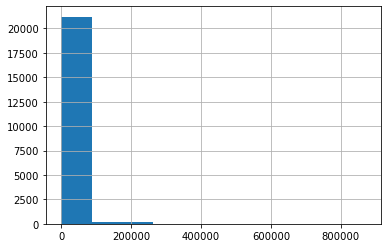

In [156]:
data['sqft_lot15'].hist()

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

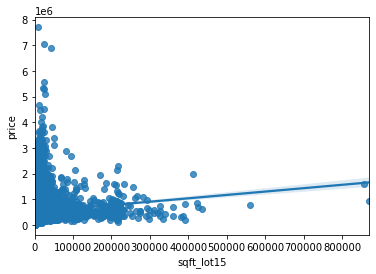

In [157]:
sns.regplot(data=data,x='sqft_lot15',y='price')

In [158]:
data['sqft_living15'].describe()

count   21597.00000
mean     1945.49609
std       735.89246
min         0.00000
25%      1460.00000
50%      1820.00000
75%      2350.00000
max      6210.00000
Name: sqft_living15, dtype: float64

<AxesSubplot:>

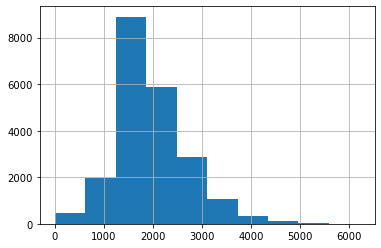

In [159]:
data['sqft_living15'].hist()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

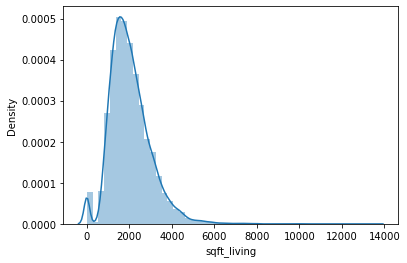

In [160]:
sns.distplot(data['sqft_living'])

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living15', ylabel='Density'>

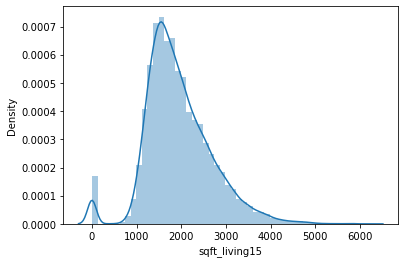

In [161]:
sns.distplot(data['sqft_living15'])

In [162]:
data['sqft_living'].mean()

2037.1767838125666

In [163]:
data['sqft_living15'].mean()

1945.496087419549

In [164]:
data[data['sqft_living']>data['sqft_living15']]['price'].mean()

630903.587252154

In [165]:
data[data['sqft_living']<data['sqft_living15']]['price'].mean()

461329.6978113543

In [166]:
data[data['sqft_living']<data['sqft_living15']].corr()['price']

id                0.01685
price             1.00000
bedrooms          0.32327
bathrooms         0.42609
sqft_living       0.64722
sqft_lot          0.04872
floors            0.23872
waterfront        0.21932
view              0.36462
condition         0.06027
grade             0.61653
sqft_above        0.55742
sqft_basement     0.27244
yr_built          0.03551
yr_renovated      0.11334
zipcode          -0.10211
lat               0.34931
long              0.06991
sqft_living15     0.66893
sqft_lot15        0.06154
month            -0.02057
combined_score    0.59382
Name: price, dtype: float64

In [167]:
len(data[data['sqft_living']>data['sqft_living15']])/len(data)

0.4460341714126962

In [168]:
len(data[data['sqft_lot']>data['sqft_lot15']])/len(data)

0.38954484419132285

In [169]:
data[data['sqft_lot']>data['sqft_lot15']]['price'].mean()

566092.1641507192

In [170]:
data[data['sqft_lot']<data['sqft_lot15']]['price'].mean()

527085.3203106332

The same situation with living size does not apply to lot size. Maybe we deal with apartments in some instances?

In [171]:
len(data['sqft_lot'].unique())

9644

In [172]:
len(data['sqft_living'].unique())

1026

In [173]:
len(data['sqft_lot15'].unique())

8573

In [174]:
len(data['sqft_living15'].unique())

774

In [175]:
data['sqft_living'].value_counts()

0       454
1300    135
1400    134
1440    130
1010    127
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1026, dtype: int64

In [176]:
data['sqft_lot'].value_counts()

0         454
5000      348
6000      286
4000      244
7200      218
         ... 
11212       1
9165        1
41300       1
17377       1
315374      1
Name: sqft_lot, Length: 9644, dtype: int64

# Missing Values and Nulls

This data set contains 21,597 entries of housing data. There is a mixture of numeric and object columns. "Data" and "sqft_basement" are indicated as objects and will probably need to be transformed into floats or integers. 

In [426]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Watefront

In [427]:
len(data[data['waterfront'].isna()])/len(data)

0.11001527989998611

11 % of the Waterfront Column in the dataset is currently null. That's a high percentage. But let's look again at the value counts for the column.

In [428]:
data['waterfront'].value_counts()

0.00000    19075
1.00000      146
Name: waterfront, dtype: int64

In [429]:
np.sum(data['waterfront']==0)/len(data)

0.8832245219243413

In [430]:
np.sum(data['waterfront']==1)/len(data)

0.006760198175672547

88% of the waterfront data is not on the waterfront, and an exceedingly small .006% of the homes are indeed on the waterfront, I think at this time it is a safe option to fill those nulls as 0. This will be changed to categorical value anyway.

In [431]:
data['waterfront'] = data['waterfront'].fillna(0)

In [432]:
data['waterfront'].value_counts()

0.00000    21451
1.00000      146
Name: waterfront, dtype: int64

In [433]:
len(data[data['waterfront'].isna()])/len(data)

0.0

## View

In [434]:
data['view'].value_counts()

0.00000    19422
2.00000      957
3.00000      508
1.00000      330
4.00000      317
Name: view, dtype: int64

In [435]:
len(data[data['view'].isna()])/len(data)

0.0029170718155299346

A very small amount of the view column are null values, in an effort not to drop these from the dataset, I'm going to think about imputing these values in some fashion.

In [436]:
data['view'].describe()

count   21534.00000
mean        0.23386
std         0.76569
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         4.00000
Name: view, dtype: float64

The mean isn't helpful here, the mode is obviously 0 as no view. So that's probably the best to go with at this time.

In [437]:
np.sum(data['view']==0)/len(data)

0.8992915682733713

In [438]:
data['view'] = data['view'].fillna(0)

In [439]:
np.sum(data['view']==0)/len(data)

0.9022086400889012

This is slightly more dramatic change to the dataset, but we still only slightly altered the distribution of the data.

## Basement Square Footage

The basement square footage is currently encoded as an object, which it should not be. Let's look at why this is the case.

In [440]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
4820.0        1
1525.0        1
1275.0        1
1281.0        1
1008.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [441]:
np.sum(data['sqft_basement']=='?')/len(data)

0.021021438162707785

In [442]:
np.sum(data['sqft_basement']=='0.0')/len(data)

0.5938787794601103

In [443]:
np.sum((data['sqft_basement']!='0.0') & (data['sqft_basement']!='?'))/len(data)

0.385099782377182

In [444]:
data['sqft_basement'] = data['sqft_basement'].replace('?', '0.0')
data['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1275.0        1
1281.0        1
935.0         1
1816.0        1
1920.0        1
Name: sqft_basement, Length: 303, dtype: int64

In [445]:
data['sqft_basement']=pd.to_numeric(data['sqft_basement'])

### Creating a Square Foot Basement Computed Column

In [446]:
data['sqft_basement_computed'] = data['sqft_living']-data['sqft_above']

In [447]:
data['sqft_basement_computed']

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement_computed, Length: 21597, dtype: int64

In [448]:
filtered_values = np.where((data['sqft_basement']!=data['sqft_basement_computed']) & (data['sqft_basement']==0))

In [449]:
loc_filter = data.loc[filtered_values].index

In [450]:
data[(data['sqft_basement_computed']>0)&(data['sqft_basement']==0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_computed
112,2525310310,9/16/2014,272500.00000,3,1.75000,1540,12600,1.00000,0.00000,0.00000,...,1160,0.00000,1980,0.00000,98038,47.36240,-122.03100,1540,11656,380
115,3626039325,11/21/2014,740500.00000,3,3.50000,4380,6350,2.00000,0.00000,0.00000,...,2780,0.00000,1900,nan,98117,47.69810,-122.36800,1830,6350,1600
309,3204800200,1/8/2015,665000.00000,4,2.75000,3320,10574,2.00000,0.00000,0.00000,...,2220,0.00000,1960,0.00000,98056,47.53760,-122.18000,2720,8330,1100
384,713500030,7/28/2014,1350000.00000,5,3.50000,4800,14984,2.00000,0.00000,2.00000,...,3480,0.00000,1998,0.00000,98006,47.55430,-122.14800,4050,19009,1320
508,5113400431,5/8/2014,615000.00000,2,1.00000,1540,6872,1.00000,0.00000,0.00000,...,820,0.00000,1946,0.00000,98119,47.64540,-122.37300,1420,5538,720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21000,291310180,6/13/2014,379500.00000,3,2.25000,1410,1287,2.00000,0.00000,0.00000,...,1290,0.00000,2005,0.00000,98027,47.53440,-122.06800,1490,1435,120
21109,3438500250,6/23/2014,515000.00000,5,3.25000,2910,5027,2.00000,0.00000,0.00000,...,2040,0.00000,2013,0.00000,98106,47.55430,-122.35900,2910,5027,870
21210,3278600680,6/27/2014,235000.00000,1,1.50000,1170,1456,2.00000,0.00000,0.00000,...,1070,0.00000,2007,0.00000,98126,47.54930,-122.37200,1360,1730,100
21356,6169901185,5/20/2014,490000.00000,5,3.50000,4460,2975,3.00000,0.00000,2.00000,...,3280,0.00000,2015,nan,98119,47.63130,-122.37000,2490,4231,1180


In [451]:
for loc in loc_filter:
    data.at[loc,'sqft_basement'] = data.at[loc,'sqft_basement_computed']

In [452]:
data['sqft_basement'].value_counts()

0.00000       13110
600.00000       221
700.00000       218
500.00000       214
800.00000       206
              ...  
2390.00000        1
602.00000         1
295.00000         1
1281.00000        1
906.00000         1
Name: sqft_basement, Length: 306, dtype: int64

In [453]:
data[data['sqft_basement']!=data['sqft_basement_computed']]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_computed


In [454]:
data = data.drop('sqft_basement_computed',axis=1)

In [455]:
#creating a variable to which columns are null in the dataframe
nan_values = data.isna()
#creating a list of columns that contain nulls
nan_columns = nan_values.any()

columns_with_nan = data.columns[nan_columns].tolist()
print(columns_with_nan)

['yr_renovated']


## Year Renovated

In [456]:
np.sum(data['yr_renovated'].isna())/len(data)

0.17789507802009538

In [457]:
np.sum(data['yr_renovated']==0)/len(data)

0.787655692920313

The year renovated value counts and a look at the dataframe suggests that the nulls are probably homes that haven't been renovated, I wouldn't want to make up years for renovation, and the value counts suggest that most homes haven't been renovated. I will set these nulls to '0'.

In [458]:
#replacing null yr_renovted column to '0'.
data["yr_renovated"].fillna(0, inplace = True)

In [459]:
#checking that null values have been replaced
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

 # Building a Baseline Model

For the baseline model I will only be including the continuous house feature variables separate from the location based-features of zip code, latitude and longtitude and date features of the house including build year, renovation year and date of sale.  

In [460]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [461]:
house_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
                  'waterfront','view','condition','grade','sqft_above','sqft_basement',
                  'sqft_living15','sqft_lot15']

In [462]:
#selecting price to be the target of the dataset
y = data["price"]
#dropping price for the bfeature set
X = data[house_features]

## Checking for Multicollinearity 

In order to make sure the baseline model meets the assumption of independence, it's important to see which variables are multi-collinear.  

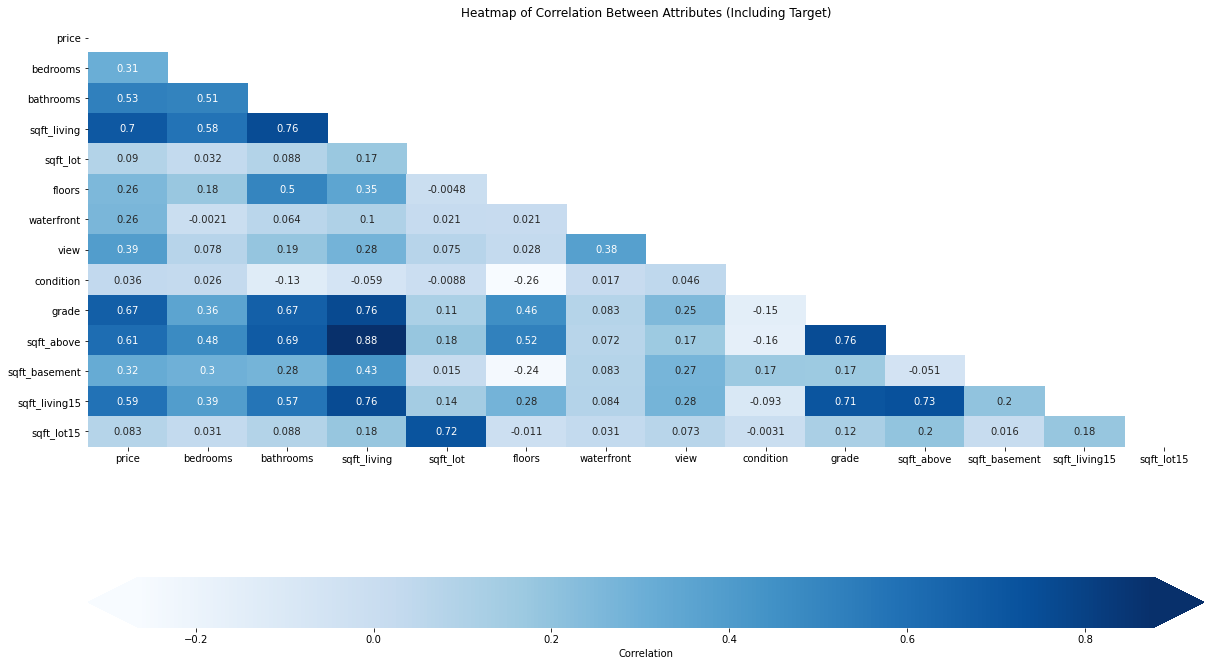

In [463]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y, X], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 12))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    cmap = 'Blues',
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

The heat matrix shows there are several multi-collinear variables over a .75 threshold. I can decide which features to initially drop. 

In [464]:
df=X.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)

df.columns = ['cc']
df.drop_duplicates(inplace=True)
df


,cc
pairs,
"(bedrooms, bedrooms)",1.00000
"(sqft_above, sqft_living)",0.87645
"(grade, sqft_living)",0.76278
"(sqft_living15, sqft_living)",0.75640
"(grade, sqft_above)",0.75607
...,...
"(floors, sqft_lot15)",0.01072
"(sqft_lot, condition)",0.00883
"(sqft_lot, floors)",0.00481


In [465]:
abs(df.corr()) > 0.75
df=X.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df[(df[0]>.75) & (df[0] <1)]

,level_0,level_1,0
119,sqft_above,sqft_living,0.87645
35,sqft_living,sqft_above,0.87645
106,grade,sqft_living,0.76278
34,sqft_living,grade,0.76278
145,sqft_living15,sqft_living,0.75640
37,sqft_living,sqft_living15,0.75640
113,grade,sqft_above,0.75607
125,sqft_above,grade,0.75607
27,sqft_living,bathrooms,0.75576
15,bathrooms,sqft_living,0.75576


Examining this correlation matrix, it seems time to remove some of the features based on their correlations. Square Feet Living is a very understandable concept, so I will be dropping "Sqft_above." "Sqft_living 15 also shows a high level of correlation to square_feet living. 

## Removing Multicollinearity 

In [466]:
to_drop = ['sqft_above','sqft_living15']

house_features = [element for element in house_features if element not in to_drop]

In [467]:
X = data[house_features]

In [468]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     21597 non-null  float64
 6   view           21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_basement  21597 non-null  float64
 10  sqft_lot15     21597 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.8 MB


## Train Test Split

Now I can perform a a train/test split of the data in order to ensure the model is not overfiting. 

In [469]:
#import sklearn train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [470]:

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 16197 rows and 11 columns
y_train is a Series with 16197 values


## Scaling Data

In order to gage the relative impact of the house features I will scaling the data
using a standard scalar.

In [471]:
#Importing the Standard Scalar
from sklearn.preprocessing import StandardScaler

In [472]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)

In [473]:
scaled_data

array([[ 0.69682284, -0.14882144,  0.1725273 , ..., -0.55667713,
         1.88979708, -0.23391118],
       [-1.50971471, -1.44337612, -1.53811406, ..., -1.40801312,
        -0.64926344, -0.28017592],
       [-0.40644593,  0.4984559 , -0.55287125, ..., -0.55667713,
         0.43890535, -0.27483768],
       ...,
       [-0.40644593,  0.4984559 , -0.55287125, ...,  0.29465886,
        -0.64926344, -0.34416363],
       [ 0.69682284,  0.4984559 ,  0.43237156, ...,  1.99733084,
        -0.64926344, -0.13664845],
       [-0.40644593, -0.47246011,  0.54064   , ...,  1.14599485,
         2.04848836,  1.18509977]])

The scaled data produces a series of arrays that will not be as interpretable without the column labels.

In [474]:
#Creating a new data frame with the scaled data. Getting the column names from the X_train dataframe. 
X_train = pd.DataFrame(scaled_data, columns = X_train.columns,index=X_train.index)

## Fitting the Baseline Model

In [475]:
from sklearn.linear_model import LinearRegression
#Instatiating the Baseline Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Scoring the Model

In [476]:
# Run this cell without changes
from sklearn.model_selection import cross_val_score

cross_val_score = cross_val_score(model, X_train, y_train, cv=8)
cross_val_score.mean()

0.5975518518659969

In [477]:
#Obtaining the model score for the Training data.
model.score(X_train, y_train)

0.602614291489027

In [478]:
#Scaling the test data
X_test = scaler.transform(X_test)

In [479]:
#Scoring the model on test data.
model.score(X_test, y_test)

0.6197702056233046

The model's cross-validated score, training score, and test score are all around 60%, meaning 60% of the variance of the data is explained by the model - good not great.

In [480]:
prediction = model.predict(X_train)
residuals = (y_train - prediction)

The baseline model is performing around 60% on the training data, and 59% on the test data. The model is not overfiting greatly, but will it adhere to the necessary assumptions.

## Analyzing the Model in Stats Model

In [481]:
import statsmodels.api as sm
stats_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     2231.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        05:01:48   Log-Likelihood:            -2.2303e+05
No. Observations:               16197   AIC:                         4.461e+05
Df Residuals:                   16185   BIC:                         4.462e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.406e+05   1816.772    297.567      0.000    5.37e+05    5.44e+05
bedrooms      -3.421e+04   2361.937    -14.485      0.000   -3.88e+04   -2.96e+04
bathrooms     -9395.9448   3130.693     -3.001      0.003   -1.55e+04   -3259.441
sqft_living    1.763e+05   3992.125     44.162      0.000    1.68e+05    1.84e+05
sqft_lot        -69.9142   2614.111     -0.027      0.979   -5193.862    5054.033
floors        -2269.9310   2457.236     -0.924      0.356   -7086.385    2546.524
waterfront     4.644e+04   1957.229     23.726      0.000    4.26e+04    5.03e+04
view           4.582e+04   2083.603     21.993      0.000    4.17e+04    4.99e+04
condition      3.408e+04   1904.274     17.898      0.000    3.03e+04    3.78e+04
grade          1.204e+05   3083.215     39.062      0.000    1.14e+05    1.26e+05
sqft_basement  1.257e+04   2400.399      5.238      0.000    7867.064    1.73e+04
sqft_lot15    -1.904e+04   2626.997     -7.248      0.000   -2.42e+04   -1.39e+04
==============================================================================
Omnibus:                    12349.218   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           891005.788
Skew:                           3.076   Prob(JB):                         0.00
Kurtosis:                      38.811   Cond. No.                         4.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

An initial examination of the Stats Model summary indicates, low p_values for many of the feature coefficients. I will consider dropping Sqft_Lot from the model as it is well above a p_value of .05 as well as the floors coefficient. 

In [482]:
to_drop = ['sqft_lot']

## Examining Baseline Residuals 

In order to check the assumptions of normality of residuals I will obtain the predictions with model on the test data.

### Normality of Residuals

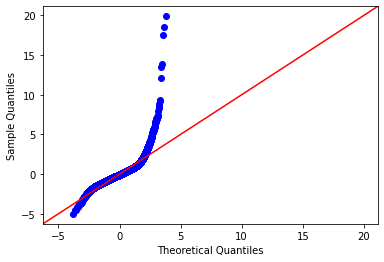

In [483]:
from scipy import stats
sm.graphics.qqplot(stats_model.resid, dist=stats.norm, line='45', fit=True);

Initially, according to this test it appears the distribution of the residuals is certainly not normally distributed. Plotting the residuals on a histogram.

''

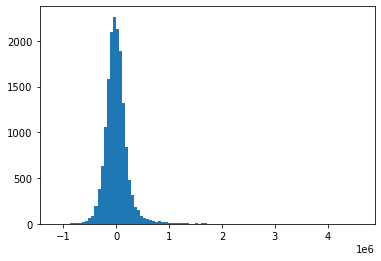

In [484]:
plt.hist(stats_model.resid, bins=100)
;

Again the residuals do not show a normal distribution in this histogram, the dataset included a long tail of the target variable and of the square foot living feature.

### Homoscedasticity

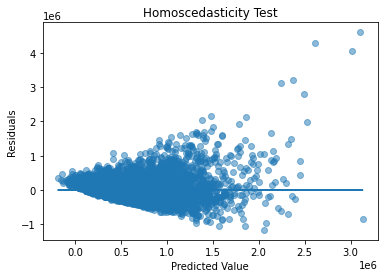

In [485]:
# Run this cell without changes
fig, ax = plt.subplots()

ax.scatter(prediction, residuals, alpha=0.5)
ax.plot(prediction, [0 for i in range(len(X_train))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Residuals")
ax.set_title('Homoscedasticity Test');

In addition to a problem with the normal distribution of residuals, the scatter plot of Predicted Values against Residuals, shows cone-like shape indicating that as the predicted values increase, the residuals appear to be increasing, though this seems to be more diffuse along the x-axis. This may be reflective of the skew of the data set as well.

The data is highly right-skewed as is the size of the many of the homes in the data set. For the second iteration of the model I will look at the data and perhaps exclude outliers. 

In [486]:
from statsmodels.stats.diagnostic import het_breuschpagan
white_test = het_breuschpagan(stats_model.resid,  stats_model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
dict(zip(labels,white_test))

{'LM Statistic': 1867.8555759467683,
 'LM-Test p-value': 0.0,
 'F-Statistic': 191.79754848543374,
 'F-Test p-value': 0.0}

# Second Model Iteration 

## Dropping High P Value Features

In [487]:
to_drop

['sqft_lot']

In [488]:
house_features = [element for element in house_features if element not in to_drop]

In [489]:
house_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_basement',
 'sqft_lot15']

## Dealing with Outliers

One of the major issues with the first model iteration was the violation of Homoscedasticity and normality of residuals. I believe another look a the dataset might be helpful as in previous data exploration, the data was highly skewed to the left.

I will reexamine this with a boxplot.

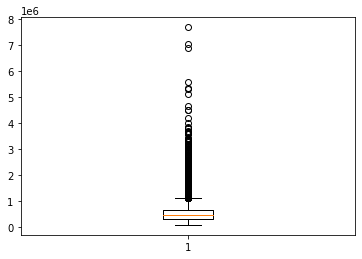

In [490]:
plt.boxplot(data['price']);

The boxplot shows that the data has a long stretch of outliers. I will use InterQuartile Range to create a cap on the outliers and their effect on the regression.

In [491]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(data['price'])


In [492]:
len(sample_outliers)/len(data)

0.053618558133074035

With this method of detecting outliers, we would lose around 5% of the dataset, but potentially create a more useful model. Give the real world data we are dealing with, a housing model that dealt with 95% of homes, would be useful. It just might be with the highest end of homes, the normal rules do not apply.

In [493]:
data = data.drop(data[data['price'].isin(sample_outliers)].index)

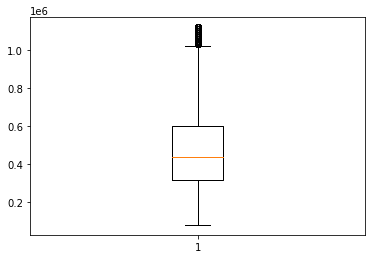

In [494]:
plt.boxplot(data['price']);

In addition to the target price outliers, the square foot living also showed a similar left skew. Let's investigate if removing the outliers of price affected that category as well.

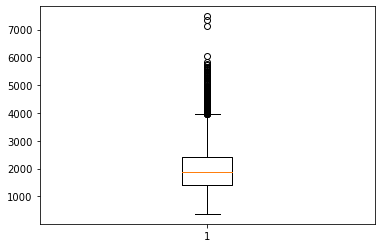

In [495]:
plt.boxplot(data['sqft_living']);

There is still a strong visual representation of outliers in this boxplot, but I will leave it in the data set before making other changes until I score the second model.

## Feature Engineering

### Neighboring Home Comparison

The dataset contains two columns - "Sqft_Lot_15" and "Sqft_Living_15" that could service as as a measure of the relative size of Lots and and Square Foot Living space of each individual home that might be an interpretable feature for the model.

In [496]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [497]:
data['sqft_living_compared'] = data['sqft_living']/data['sqft_living15']*100

In [498]:
data['sqft_lot_compared']=data['sqft_lot']/data['sqft_lot15']*100

In [499]:
house_features.append('sqft_living_compared')

In [500]:
house_features.append('sqft_lot_compared')

In [501]:
to_drop = ['sqft_living15','sqft_lot15']
house_features = [element for element in house_features if element not in to_drop]

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living_compared', ylabel='price'>

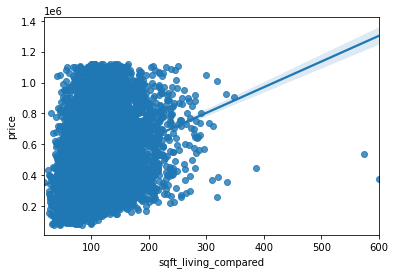

In [502]:
sns.regplot(data['sqft_living_compared'],data['price'])

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_lot_compared', ylabel='price'>

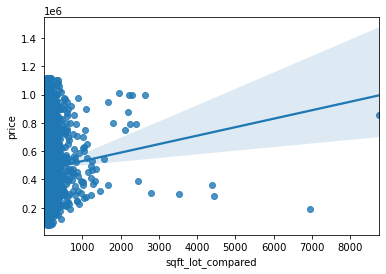

In [503]:
sns.regplot(data['sqft_lot_compared'],data['price'])

### Home Age

Perhaps it would be helpful to include in the model information related to the age of the home. The model will not be able to understand year of build as a feature, but may be able to understand the age of the home.

In [504]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20439 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    20439 non-null  int64  
 1   date                  20439 non-null  object 
 2   price                 20439 non-null  float64
 3   bedrooms              20439 non-null  int64  
 4   bathrooms             20439 non-null  float64
 5   sqft_living           20439 non-null  int64  
 6   sqft_lot              20439 non-null  int64  
 7   floors                20439 non-null  float64
 8   waterfront            20439 non-null  float64
 9   view                  20439 non-null  float64
 10  condition             20439 non-null  int64  
 11  grade                 20439 non-null  int64  
 12  sqft_above            20439 non-null  int64  
 13  sqft_basement         20439 non-null  float64
 14  yr_built              20439 non-null  int64  
 15  yr_renovated       

In [507]:
data['age']=data['date'].dt.year - data['yr_built']

In [508]:
house_features.append('age')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='price'>

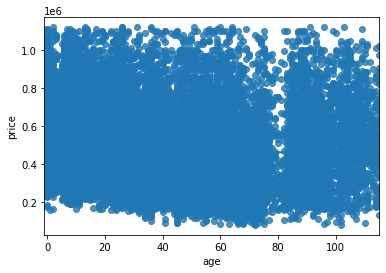

In [509]:
sns.regplot(data['age'],data['price'])

I do not believe age meets the standard of linearity that is needed for performing regression.

In [510]:
house_features.remove('age')

### Renovation Status

Another available column of information is renovation. Many of the homes were not renovated, but I can still create a renovatoin feature.

In [511]:
data['renovated']=data['yr_renovated']>1

In [512]:
data['renovated']=data['renovated']*1

### Model Fitter

In [513]:
def model_iteration(X, y):
    #import sklearn train/test split
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
#     #Importing the Standard Scalar
#     from sklearn.preprocessing import StandardScaler

    from sklearn.linear_model import LinearRegression
    #Instatiating the Baseline Model
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model, X_train, X_test, y_train, y_test

In [514]:
X = data[house_features]
y = data['price']

In [515]:
second_model, X_train, X_test, y_train, y_test = model_iteration(X,y)

In [516]:
def scaled_X(X_train,X_test):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X_train)
    
#     Creating a new data frame with the scaled data. Getting the column names from the X_train dataframe. 
    scaled_X_train = pd.DataFrame(scaled_data, columns = X_train.columns,index=X_train.index)
    scaled_X_test = scaler.transform(X_test)
    
    return scaled_X_train, scaled_X_test

### MultiCollinearity Check

In [517]:
df=X.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)

df.columns = ['cc']
df.drop_duplicates(inplace=True)
df
abs(df.corr()) > 0.75
df=X.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df[(df[0]>.75) & (df[0] <1)]

,level_0,level_1,0


### Model Score

In [518]:
def model_score(model, X_train, X_test, y_train, y_test):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    return f'Train Score = {train_score}, Test Score = {test_score}'


In [519]:
model_score(second_model, X_train, X_test, y_train, y_test)

'Train Score = 0.5054460285367008, Test Score = 0.49330562646352305'

### Residual Helpers

In [520]:
def residual_helper(model,X_train,y_train):
    prediction = model.predict(X_train)
    residuals = (y_train - prediction)
    return prediction, residuals

In [521]:
prediction, residuals = residual_helper(second_model,X_train,y_train)

### Residual Plots

''

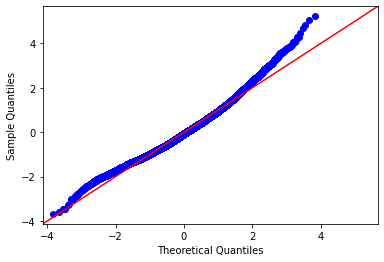

In [522]:
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);
;

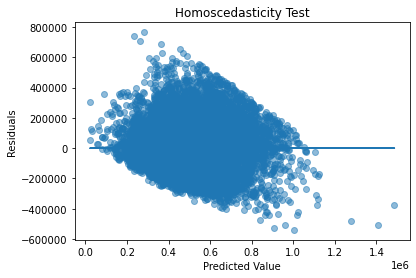

In [523]:
# Run this cell without changes
fig, ax = plt.subplots()

ax.scatter(prediction, residuals, alpha=0.5)
ax.plot(prediction, [0 for i in range(len(X_train))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Residuals")
ax.set_title('Homoscedasticity Test');

### Stats Models Helper

In [526]:
def Stats_Mod_Helper(y_train,X_train):
    stats_mod = sm.OLS(y_train,X_train)
    results = stats_mod.fit()
    
    return sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

In [527]:
Stats_Mod_Helper(y_train,X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     1423.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        05:07:39   Log-Likelihood:            -2.0409e+05
No. Observations:               15329   AIC:                         4.082e+05
Df Residuals:                   15317   BIC:                         4.083e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -4.14e+05   1.44e+04    -28.785      0.000   -4.42e+05   -3.86e+05
bedrooms             -7139.9164   1648.788     -4.330      0.000   -1.04e+04   -3908.095
bathrooms            -1.959e+04   2689.736     -7.283      0.000   -2.49e+04   -1.43e+04
sqft_living            102.4033      3.192     32.082      0.000      96.147     108.660
floors                3.153e+04   3036.078     10.385      0.000    2.56e+04    3.75e+04
waterfront            1.026e+05   2.54e+04      4.035      0.000    5.28e+04    1.52e+05
view                  3.364e+04   1968.734     17.087      0.000    2.98e+04    3.75e+04
condition             4.171e+04   1922.366     21.695      0.000    3.79e+04    4.55e+04
grade                 7.917e+04   1839.145     43.046      0.000    7.56e+04    8.28e+04
sqft_basement           49.0394      3.804     12.890      0.000      41.582      56.497
sqft_living_compared  -520.6329     50.614    -10.286      0.000    -619.842    -421.424
sqft_lot_compared       23.5455      8.879      2.652      0.008       6.142      40.949
==============================================================================
Omnibus:                      777.481   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              954.210
Skew:                           0.529   Prob(JB):                    6.25e-208
Kurtosis:                       3.612   Cond. No.                     4.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Second Model Assesment 

The second model displayed a lower R Squared, but seemed to show a better adherence to the assumptions of normality and homoscedasticity. Trimming the outliers seems to have helped the model, but maybe some of the features were not helpful. I will definitely drop the square foot basement, and see what other features can be dropped. 

## Feature Selection

In [528]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_validate, ShuffleSplit
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

In [529]:
# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
floors: True
waterfront: True
view: True
condition: True
grade: True
sqft_basement: True
sqft_living_compared: True
sqft_lot_compared: False


I will be dropping the Square Foot Basement column, the Square Foot Lot Compared feature.

In [530]:
to_drop = ['sqft_lot_compared']

In [531]:
# Run this cell without changes
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 15329 rows and 11 columns
y_train is a Series with 15329 values


# Third Model Iteration

## Categorical Feature Engineering

### Location Information

The first two iterations of the model did not utilize location information, but location most likely plays a role in the valuation of homes. Currently the dataset features 70 zip codes. In order to reduce the number of features and make them interpretable I will add join the zip codes to city names. 

I will also add some information about seasonality of sale to give some additional information to the model to improve the R-Squared. I hope that dropping the insignificant features and adding this categorical information will show improvement.

In [532]:
len(data['zipcode'].value_counts())

70

In [533]:
zip_df = pd.read_csv('data/uszips.csv')

In [534]:
zip_df

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18005,-66.75218,Adjuntas,PR,Puerto Rico,True,nan,17113.00000,102.70000,72001,Adjuntas,"{""72001"": ""99.43"", ""72141"": ""0.57""}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36074,-67.17519,Aguada,PR,Puerto Rico,True,nan,37751.00000,476.00000,72003,Aguada,"{""72003"": ""100""}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45440,-67.12201,Aguadilla,PR,Puerto Rico,True,nan,47081.00000,574.90000,72005,Aguadilla,"{""72005"": ""100""}",Aguadilla,72005,False,False,America/Puerto_Rico
3,606,18.16721,-66.93828,Maricao,PR,Puerto Rico,True,nan,6392.00000,58.30000,72093,Maricao,"{""72093"": ""94.88"", ""72153"": ""3.78"", ""72121"": ""1.35""}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29032,-67.12244,Anasco,PR,Puerto Rico,True,nan,26686.00000,286.90000,72011,Añasco,"{""72011"": ""99.45"", ""72003"": ""0.55""}",Añasco|Aguada,72011|72003,False,False,America/Puerto_Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,99923,55.97796,-130.03671,Hyder,AK,Alaska,True,nan,14.00000,0.30000,2198,Prince of Wales-Hyder,"{""02198"": ""100""}",Prince of Wales-Hyder,02198,False,False,America/Sitka
33116,99925,55.55796,-132.97482,Klawock,AK,Alaska,True,nan,908.00000,6.30000,2198,Prince of Wales-Hyder,"{""02198"": ""100""}",Prince of Wales-Hyder,02198,False,False,America/Sitka
33117,99926,55.12617,-131.48928,Metlakatla,AK,Alaska,True,nan,1654.00000,4.80000,2198,Prince of Wales-Hyder,"{""02198"": ""100""}",Prince of Wales-Hyder,02198,False,False,America/Metlakatla
33118,99927,56.25100,-133.37572,Point Baker,AK,Alaska,True,nan,0.00000,0.00000,2198,Prince of Wales-Hyder,"{""02198"": ""100""}",Prince of Wales-Hyder,02198,False,False,America/Sitka


The zip code Data Frame contains a lot of information I probably won't use, so I will only make a Data Frame of columns that seem relevant.

In [535]:
zip_df = zip_df[['zip','city','state_name','population','density','county_name']]

This is a large data set and I will narrow it down to only Kings County zip codes.

In [536]:
data['zipcode'].value_counts().index

Int64Index([98103, 98038, 98052, 98115, 98042, 98117, 98034, 98118, 98023,
            98133, 98058, 98059, 98155, 98074, 98056, 98006, 98125, 98027,
            98053, 98033, 98001, 98126, 98092, 98106, 98075, 98144, 98029,
            98116, 98065, 98146, 98028, 98003, 98198, 98031, 98199, 98122,
            98168, 98055, 98008, 98072, 98107, 98178, 98136, 98030, 98166,
            98022, 98177, 98045, 98002, 98011, 98019, 98077, 98108, 98105,
            98112, 98040, 98004, 98119, 98005, 98007, 98188, 98032, 98014,
            98070, 98010, 98102, 98109, 98024, 98148, 98039],
           dtype='int64')

In [537]:
#Creating a list of zips to filter from
kings_zips = list(data['zipcode'].value_counts().index)

In [538]:
zip_df = zip_df[zip_df['zip'].isin(kings_zips)]

In [539]:
zip_df

,zip,city,state_name,population,density,county_name
32286,98001,Auburn,Washington,33699.00000,699.30000,King
32287,98002,Auburn,Washington,33468.00000,1797.10000,King
32288,98003,Federal Way,Washington,49533.00000,1644.40000,King
32289,98004,Bellevue,Washington,36202.00000,1985.40000,King
32290,98005,Bellevue,Washington,19223.00000,987.70000,King
...,...,...,...,...,...,...
32373,98177,Seattle,Washington,20676.00000,1409.10000,King
32374,98178,Seattle,Washington,27335.00000,2178.20000,King
32375,98188,Seattle,Washington,25175.00000,1290.80000,King
32377,98198,Seattle,Washington,37966.00000,1901.30000,King


In [540]:
#Creating a dataframe of zipcodes and cities
zip_city = zip_df[['zip','city']].sort_values(by='city')

In [541]:
zip_city

,zip,city
32286,98001,Auburn
32287,98002,Auburn
32339,98092,Auburn
32289,98004,Bellevue
32290,98005,Bellevue
...,...,...
32346,98107,Seattle
32331,98065,Snoqualmie
32333,98070,Vashon
32337,98077,Woodinville


In [626]:
data.groupby('city').mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville,month_sale,spring,summer,winter
city,,,,,,,,,,,,,,,,,,,,,
Auburn,4391561101.74314,291647.81998,3.42042,2.06202,1955.94292,20092.99122,1.47640,0.00000,0.09221,3.41822,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6.53568,0.31394,0.26015,0.18990
Bellevue,4547493663.20594,676710.23291,3.71673,2.18907,2267.40198,11961.22302,1.30306,0.00090,0.21493,3.68885,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6.70504,0.29496,0.31295,0.15827
Black Diamond,3879195406.67000,423665.99000,3.29000,2.02750,2137.59000,55465.30000,1.48000,0.00000,0.10000,3.53000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6.11000,0.29000,0.35000,0.23000
Bothell,4284960781.10769,490377.10769,3.54872,2.27821,2253.09744,11314.13846,1.50256,0.00000,0.06154,3.22051,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,7.22564,0.24615,0.29231,0.17949
Carnation,4322388566.13223,426500.18182,2.96694,1.98140,2020.07438,90361.76033,1.48347,0.00000,0.17355,3.15702,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,7.14050,0.29752,0.33058,0.13223
Duvall,3137917864.83684,424815.06316,3.36316,2.29079,2171.55789,39838.38421,1.72105,0.00000,0.02105,3.07368,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6.26842,0.36316,0.32105,0.18947
Enumclaw,4014550115.06438,316742.39056,3.15880,1.91845,1837.31330,74233.91416,1.32403,0.00000,0.63090,3.73391,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6.83262,0.21888,0.27897,0.20172
Fall City,2705285627.95890,486844.79452,3.23288,2.01027,2097.46575,84140.65753,1.35616,0.00000,0.15068,3.27397,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6.42466,0.32877,0.19178,0.17808
Federal Way,5197225337.49936,287008.77864,3.40026,2.05373,1961.24582,10433.52124,1.31725,0.00257,0.14672,3.38224,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6.61133,0.27671,0.26255,0.21364


In [542]:
#Making a dictionary of zip codes and cities
zip_dict = dict(zip(zip_city.zip, zip_city.city))
zip_dict

{98001: 'Auburn',
 98002: 'Auburn',
 98092: 'Auburn',
 98004: 'Bellevue',
 98005: 'Bellevue',
 98006: 'Bellevue',
 98007: 'Bellevue',
 98008: 'Bellevue',
 98010: 'Black Diamond',
 98011: 'Bothell',
 98014: 'Carnation',
 98019: 'Duvall',
 98022: 'Enumclaw',
 98024: 'Fall City',
 98023: 'Federal Way',
 98003: 'Federal Way',
 98027: 'Issaquah',
 98029: 'Issaquah',
 98028: 'Kenmore',
 98030: 'Kent',
 98031: 'Kent',
 98032: 'Kent',
 98042: 'Kent',
 98033: 'Kirkland',
 98034: 'Kirkland',
 98038: 'Maple Valley',
 98039: 'Medina',
 98040: 'Mercer Island',
 98045: 'North Bend',
 98052: 'Redmond',
 98053: 'Redmond',
 98055: 'Renton',
 98056: 'Renton',
 98058: 'Renton',
 98059: 'Renton',
 98074: 'Sammamish',
 98075: 'Sammamish',
 98125: 'Seattle',
 98126: 'Seattle',
 98133: 'Seattle',
 98136: 'Seattle',
 98144: 'Seattle',
 98146: 'Seattle',
 98168: 'Seattle',
 98155: 'Seattle',
 98166: 'Seattle',
 98122: 'Seattle',
 98177: 'Seattle',
 98178: 'Seattle',
 98188: 'Seattle',
 98148: 'Seattle',
 98119

In [543]:
data['city'] = data['zipcode'].map(zip_dict)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20439 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    20439 non-null  int64         
 1   date                  20439 non-null  datetime64[ns]
 2   price                 20439 non-null  float64       
 3   bedrooms              20439 non-null  int64         
 4   bathrooms             20439 non-null  float64       
 5   sqft_living           20439 non-null  int64         
 6   sqft_lot              20439 non-null  int64         
 7   floors                20439 non-null  float64       
 8   waterfront            20439 non-null  float64       
 9   view                  20439 non-null  float64       
 10  condition             20439 non-null  int64         
 11  grade                 20439 non-null  int64         
 12  sqft_above            20439 non-null  int64         
 13  sqft_basement   

## One Hot Encoding "City"

In [544]:
len(data['city'].value_counts())

24

For this iteration I will be one hot encoding the cities as seperate features. There will be 23 features that I will be modeled along with house features.

In [545]:
city_dummies = pd.get_dummies(data['city'],drop_first=True)

In [546]:
city_cols = list(city_dummies.columns)

In [547]:
data = pd.concat([data, city_dummies], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20439 entries, 0 to 21596
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    20439 non-null  int64         
 1   date                  20439 non-null  datetime64[ns]
 2   price                 20439 non-null  float64       
 3   bedrooms              20439 non-null  int64         
 4   bathrooms             20439 non-null  float64       
 5   sqft_living           20439 non-null  int64         
 6   sqft_lot              20439 non-null  int64         
 7   floors                20439 non-null  float64       
 8   waterfront            20439 non-null  float64       
 9   view                  20439 non-null  float64       
 10  condition             20439 non-null  int64         
 11  grade                 20439 non-null  int64         
 12  sqft_above            20439 non-null  int64         
 13  sqft_basement   

The DataSet know contains the additional features for a the second iteration of modeling. Having now droppe the outliers, and one-hot encoded the cities, it may be time for another pass at modeling. 

I will be making some helper functions for the second iteration of the model.

##  Month of Sale

In [548]:
data['month_sale']=data['date'].dt.month
data['month_sale']

0        10
1        12
2         2
3        12
4         2
         ..
21592     5
21593     2
21594     6
21595     1
21596    10
Name: month_sale, Length: 20439, dtype: int64

In [549]:
def season_of_date(date_UTC):
    year = str(date_UTC.year)
    seasons = {'spring': pd.date_range(start= year +'-03-21 00:00:00', end=year + '-06-20 00:00:00'),
               'summer': pd.date_range(start= year + '-06-21 00:00:00', end= year + '-09-22 00:00:00'),
               'autumn': pd.date_range(start= year + '-09-23 00:00:00', end= year + '-12-20 00:00:00')}
    if date_UTC in seasons['spring']:
        return 'spring'
    if date_UTC in seasons['summer']:
        return 'summer'
    if date_UTC in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

data['season'] = data.date.map(season_of_date)


## One Hot Encoding Season

In [550]:
season_dummies = pd.get_dummies(data['season'],drop_first=True)

In [551]:
season_cols = list(season_dummies.columns)

In [552]:
data = pd.concat([data, season_dummies], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20439 entries, 0 to 21596
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    20439 non-null  int64         
 1   date                  20439 non-null  datetime64[ns]
 2   price                 20439 non-null  float64       
 3   bedrooms              20439 non-null  int64         
 4   bathrooms             20439 non-null  float64       
 5   sqft_living           20439 non-null  int64         
 6   sqft_lot              20439 non-null  int64         
 7   floors                20439 non-null  float64       
 8   waterfront            20439 non-null  float64       
 9   view                  20439 non-null  float64       
 10  condition             20439 non-null  int64         
 11  grade                 20439 non-null  int64         
 12  sqft_above            20439 non-null  int64         
 13  sqft_basement   

## Third Model Iteration

In [573]:
house_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_basement',
 'sqft_living_compared']

In [574]:
house_features = [element for element in house_features if element not in to_drop]

In [579]:
X = data[house_features+city_cols+season_cols]
y = data['price']

In [580]:
third_model, X_train, X_test, y_train, y_test = model_iteration(X,y)

## Scoring Third Model

In [581]:
model_score(third_model, X_train, X_test, y_train, y_test)

'Train Score = 0.6960352210702934, Test Score = 0.7063994618858418'

In [582]:
# Run this cell without changes
from sklearn.model_selection import cross_val_score

cross_val_score = cross_val_score(third_model, X_train, y_train, cv=8)
cross_val_score.mean()

0.6943077159360957

## Residual Tests

In [583]:
prediction, residuals = residual_helper(third_model,X_train,y_train)

''

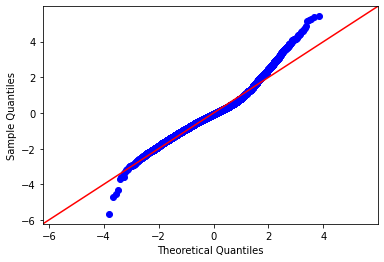

In [584]:
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);
;

''

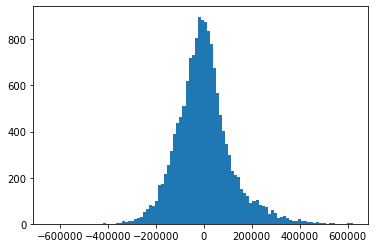

In [585]:
plt.hist(residuals, bins=100)
;

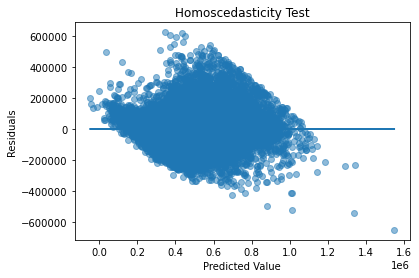

In [586]:
# Run this cell without changes
fig, ax = plt.subplots()

ax.scatter(prediction, residuals, alpha=0.5)
ax.plot(prediction, [0 for i in range(len(X_train))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Residuals")
ax.set_title('Homoscedasticity Test');

In [587]:
scaled_X_train, scaled_X_test = scaled_X(X_train,X_test)

In [588]:
Stats_Mod_Helper(y_train,scaled_X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     972.7
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        05:17:39   Log-Likelihood:            -2.0034e+05
No. Observations:               15329   AIC:                         4.008e+05
Df Residuals:                   15292   BIC:                         4.010e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.778e+05    927.793    515.001      0.000    4.76e+05     4.8e+05
bedrooms             -7621.3444   1219.395     -6.250      0.000      -1e+04   -5231.186
bathrooms             2976.6549   1520.429      1.958      0.050      -3.567    5956.877
sqft_living            9.74e+04   2075.070     46.939      0.000    9.33e+04    1.01e+05
floors                6297.1748   1323.422      4.758      0.000    3703.111    8891.239
waterfront            5151.6933    988.907      5.209      0.000    3213.317    7090.069
view                  1.857e+04   1027.991     18.064      0.000    1.66e+04    2.06e+04
condition             2.541e+04    994.092     25.558      0.000    2.35e+04    2.74e+04
sqft_basement        -5926.4246   1283.988     -4.616      0.000   -8443.194   -3409.655
sqft_living_compared -1.516e+04   1272.797    -11.907      0.000   -1.77e+04   -1.27e+04
grade                 6.046e+04   1539.644     39.268      0.000    5.74e+04    6.35e+04
Bellevue              6.759e+04   1363.330     49.580      0.000    6.49e+04    7.03e+04
Black Diamond         6630.0476    974.964      6.800      0.000    4719.002    8541.093
Bothell               1.408e+04   1017.004     13.843      0.000    1.21e+04    1.61e+04
Carnation             1.031e+04    980.426     10.512      0.000    8384.630    1.22e+04
Duvall                1.035e+04   1020.658     10.145      0.000    8353.791    1.24e+04
Enumclaw              1810.0521   1044.886      1.732      0.083    -238.049    3858.154
Fall City             1.156e+04    965.063     11.974      0.000    9663.733    1.34e+04
Federal Way          -3366.1730   1238.572     -2.718      0.007   -5793.921    -938.425
Issaquah               3.54e+04   1226.183     28.869      0.000     3.3e+04    3.78e+04
Kenmore               1.521e+04   1047.461     14.520      0.000    1.32e+04    1.73e+04
Kent                  1199.5403   1365.811      0.878      0.380   -1477.613    3876.693
Kirkland              4.984e+04   1278.005     39.000      0.000    4.73e+04    5.23e+04
Maple Valley          6602.7026   1179.804      5.596      0.000    4290.146    8915.259
Medina                8660.6464    930.377      9.309      0.000    6836.997    1.05e+04
Mercer Island         3.828e+04   1021.955     37.457      0.000    3.63e+04    4.03e+04
North Bend             1.23e+04   1032.270     11.916      0.000    1.03e+04    1.43e+04
Redmond               5.154e+04   1310.080     39.340      0.000     4.9e+04    5.41e+04
Renton                1.987e+04   1462.436     13.586      0.000     1.7e+04    2.27e+04
Sammamish             4.075e+04   1265.375     32.202      0.000    3.83e+04    4.32e+04
Seattle               1.102e+05   2313.182     47.655      0.000    1.06e+05    1.15e+05
Snoqualmie            1.495e+04   1078.946     13.854    

# Model Assessment 

The final model showed a marked improvement on the R-Squared score. The residuals look normally distributed, with still some skew. Heteroscedasticity remains an issue so I believe that calls the model into question. The p-values for "summer" in the categorical season is above the desired level, as is the cities of Kent and Enumclaw. I would weigh these against the low p-values of the features in the same category. 

In [589]:
results_summary = Stats_Mod_Helper(y_train,scaled_X_train)

results_as_html = results_summary.tables[1].as_html()
Results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [590]:
Results_df

,coef,std err,t,P>|t|,[0.025,0.975]
const,477800.00000,927.79300,515.00100,0.00000,476000.00000,480000.00000
bedrooms,-7621.34440,1219.39500,-6.25000,0.00000,-10000.00000,-5231.18600
bathrooms,2976.65490,1520.42900,1.95800,0.05000,-3.56700,5956.87700
sqft_living,97400.00000,2075.07000,46.93900,0.00000,93300.00000,101000.00000
floors,6297.17480,1323.42200,4.75800,0.00000,3703.11100,8891.23900
waterfront,5151.69330,988.90700,5.20900,0.00000,3213.31700,7090.06900
view,18570.00000,1027.99100,18.06400,0.00000,16600.00000,20600.00000
condition,25410.00000,994.09200,25.55800,0.00000,23500.00000,27400.00000
sqft_basement,-5926.42460,1283.98800,-4.61600,0.00000,-8443.19400,-3409.65500
sqft_living_compared,-15160.00000,1272.79700,-11.90700,0.00000,-17700.00000,-12700.00000


## House Features Assessment 

### Scaled Comparison

In [591]:
House_Sum = Results_df.loc[house_features,:]

In [610]:
House_Sum = House_Sum.sort_values(by='coef',ascending=False)
House_Sum = House_Sum.reset_index()
House_Sum

,index,coef,std err,t,P>|t|,[0.025,0.975]
0,sqft_living,97400.00000,2075.07000,46.93900,0.00000,93300.00000,101000.00000
1,grade,60460.00000,1539.64400,39.26800,0.00000,57400.00000,63500.00000
2,condition,25410.00000,994.09200,25.55800,0.00000,23500.00000,27400.00000
3,view,18570.00000,1027.99100,18.06400,0.00000,16600.00000,20600.00000
4,floors,6297.17480,1323.42200,4.75800,0.00000,3703.11100,8891.23900
5,waterfront,5151.69330,988.90700,5.20900,0.00000,3213.31700,7090.06900
6,bathrooms,2976.65490,1520.42900,1.95800,0.05000,-3.56700,5956.87700
7,sqft_basement,-5926.42460,1283.98800,-4.61600,0.00000,-8443.19400,-3409.65500
8,bedrooms,-7621.34440,1219.39500,-6.25000,0.00000,-10000.00000,-5231.18600
9,sqft_living_compared,-15160.00000,1272.79700,-11.90700,0.00000,-17700.00000,-12700.00000


Text(0.5, 1.0, 'Home Features Impact')

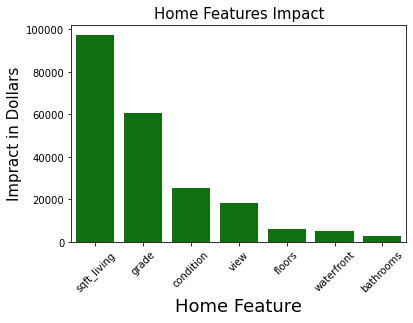

In [625]:
sns.barplot(data=House_Sum.iloc[:7],x='index',y='coef', color='Green')
plt.xlabel('Home Feature', fontsize=18)
plt.ylabel('Impract in Dollars', fontsize=15)
plt.xticks(rotation=45);
plt.title('Home Features Impact',size=15)


Based on the scaled data, an improvement of one standard deviation of the square-foot living space would add 97,400 dollars to the value of a home. The grade and condition column are the next ranked coefficients when scaled. View also ranks as another feature, but certainly one that cannot be altered.

I would think it best to use these coefficients to look at their real dollar value.

### Real Dollar Coefficients

In [608]:
real_results_summary = Stats_Mod_Helper(y_train,X_train)

real_results_as_html = real_results_summary.tables[1].as_html()
real_Results_df = pd.read_html(real_results_as_html, header=0, index_col=0)[0]

In [594]:
order = House_Sum.index

In [615]:
real_Results_df
real_House_Sum = real_Results_df.loc[house_features,:]
real_House_Sum = real_House_Sum.reindex(index=order).reset_index()
real_House_Sum

,index,coef,std err,t,P>|t|,[0.025,0.975]
0,sqft_living,126.03570,2.68500,46.93900,0.00000,120.77300,131.29900
1,grade,58370.00000,1486.40300,39.26800,0.00000,55500.00000,61300.00000
2,condition,39270.00000,1536.63200,25.55800,0.00000,36300.00000,42300.00000
3,view,29350.00000,1624.49200,18.06400,0.00000,26200.00000,32500.00000
4,floors,11700.00000,2459.88300,4.75800,0.00000,6883.08200,16500.00000
5,waterfront,102300.00000,19600.00000,5.20900,0.00000,63800.00000,141000.00000
6,bathrooms,4196.31180,2143.41100,1.95800,0.05000,-5.02900,8397.65200
7,sqft_basement,-14.59980,3.16300,-4.61600,0.00000,-20.80000,-8.40000
8,bedrooms,-8669.08950,1387.03100,-6.25000,0.00000,-11400.00000,-5950.34300
9,sqft_living_compared,-504.08780,42.33400,-11.90700,0.00000,-587.06700,-421.10800


In the unscaled version of the model, ranked by the scaled values. An additional square footage of living space would add 126 to a property with only a standard error of $2.66. An additional floor would add 11,700. Certainly an improvement of Grade or Condition would yield value, but these may be harder to practically achieve.

Text(0.5, 1.0, 'Top Ten Coefficients Per House Feature Unscaled')

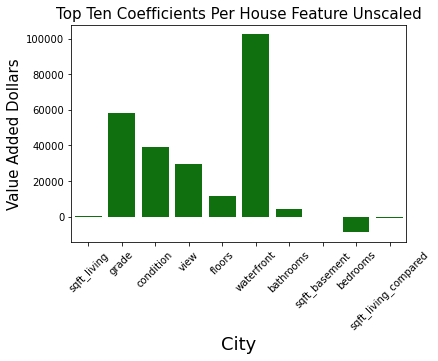

In [604]:
sns.barplot(data=real_House_Sum.iloc[:10],x='index',y='coef', color='Green')
plt.xlabel('City', fontsize=18)
plt.ylabel('Value Added Dollars',fontsize=15)
plt.xticks(rotation=45);
plt.title('Top Ten Coefficients Per House Feature Unscaled',size=15)


## Location Assessment 

In [596]:
Location_Sum = Results_df.loc[city_cols,:]
Location_Sum = Location_Sum.sort_values(by='coef',ascending=False)
Location_Sum = Location_Sum.reset_index()

Examining the One-hot encoded coefficients, the value added to the home price is displayed in the above dataframe.

In [597]:
Location_Sum.iloc[:10]

,index,coef,std err,t,P>|t|,[0.025,0.975]
0,Seattle,110200.00000,2313.18200,47.65500,0.00000,106000.00000,115000.00000
1,Bellevue,67590.00000,1363.33000,49.58000,0.00000,64900.00000,70300.00000
2,Redmond,51540.00000,1310.08000,39.34000,0.00000,49000.00000,54100.00000
3,Kirkland,49840.00000,1278.00500,39.00000,0.00000,47300.00000,52300.00000
4,Sammamish,40750.00000,1265.37500,32.20200,0.00000,38300.00000,43200.00000
5,Mercer Island,38280.00000,1021.95500,37.45700,0.00000,36300.00000,40300.00000
6,Issaquah,35400.00000,1226.18300,28.86900,0.00000,33000.00000,37800.00000
7,Woodinville,27010.00000,1137.78400,23.73500,0.00000,24800.00000,29200.00000
8,Renton,19870.00000,1462.43600,13.58600,0.00000,17000.00000,22700.00000
9,Kenmore,15210.00000,1047.46100,14.52000,0.00000,13200.00000,17300.00000


Text(0.5, 1.0, 'Top Ten King County City Coefficients')

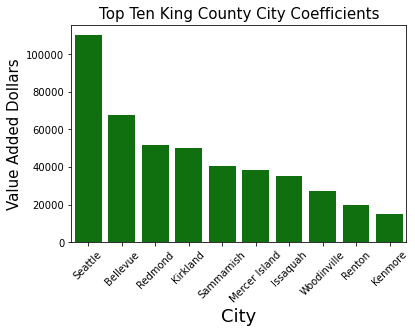

In [598]:
sns.barplot(data=Location_Sum.iloc[:10],x='index',y='coef', color='Green')
plt.xlabel('City', fontsize=18)
plt.ylabel('Value Added Dollars',fontsize=15)
plt.xticks(rotation=45);
plt.title('Top Ten King County City Coefficients',size=15)


# Conclusions

* The model showed an R-Squared of nearly 70%, with what appeared to be close to normality of residuals and some problems with Heteroskedasticity. Outliers were dropped from the dataset and I believe the model struggled with higher priced homes. 

* I superior model could have dealt with location data differently, as its my belief location plays a strong role in the price. I think there might be a city interaction that could have been built into the model.

* As always more recent data, especially during and after Covid would be helpful. 

